# Imports

In [65]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.integrate import ode
import seaborn as sns
sns.set()

# Parameter

In [66]:
N_h= 1.29e9 + 250+89+2e5
N_d = 3.5e7 +2e5+1e5+2e5

λ_h = 1.54e7
λ_d = 3e6

μ_h = 0.0066
μ_e = 0.3 
μ_d = 0.08
μ_rd= 1
μ_rh= 1

r_1 = 365/45 #####
δ = 0.01 #####
σ_d=  0.12 ######

β_d= 1.58e-7 # from paper
β_h= 2.29e-12 #from paper

β_dd= 1.58e-7 * N_d
β_dh= 2.29e-12 * N_h


ψ_d=0.09
ψ_h=0.54

γ_d=6
γ_h=6

χ_d=0.4
χ_h=0.4
 
α_d=1
α_h=1

# ODEs

In [67]:
from ast import Lambda
from audioop import mul
from random import betavariate
from types import LambdaType

from pyparsing import alphanums

In [69]:
def dP4_dt(t, P): #original function
    # Here P is a vector such that S=P[0], E=P[1], ... . This function returns [S', E', ...]
    S_d, E_d, I_d, Q_d, V_d,    S_h,E_h,I_h,V_h = P

    dS_d = λ_d -μ_d*S_d-(β_dd*I_d*S_d)/(N_d-Q_d) -ψ_d*S_d + γ_d*(1-χ_d)*E_d +α_d*V_d +r_1*Q_d 
    dE_d = -μ_e*E_d + (β_dd*I_d*(S_d+V_d*δ))/(N_d-Q_d) - γ_d*E_d -σ_d*E_d -μ_d*E_d -ψ_d*E_d
    dI_d = γ_d*χ_d*E_d -μ_d*I_d - μ_rd*I_d
    dQ_d = σ_d*E_d -r_1*Q_d -μ_d*Q_d -μ_e*Q_d - μ_rd*Q_d 
    dV_d = -μ_d*V_d-(β_dd*I_d*V_d*δ)/(N_d-Q_d) + ψ_d*S_d -α_d*V_d +ψ_d*E_d 
    
    dS_h = λ_h -μ_h*S_h-(β_dh*I_d*S_h)/N_h -ψ_h*S_h + γ_h*(1-χ_h)*E_h +α_h*V_h 
    dE_h = (β_dh*I_d*(S_h+V_h*δ))/N_h - γ_h*E_h -μ_h*E_h -ψ_h*E_h
    dI_h = γ_h*χ_h*E_h -μ_h*I_h - μ_rh*I_h
    dV_h = -μ_h*V_h-(β_dh*I_d*V_h*δ)/N_h + ψ_h*S_h -α_h*V_h +ψ_h*E_h 
    
    return [dS_d, dE_d, dI_d, dQ_d, dV_d, dS_h, dE_h, dI_h, dV_h]

# Initial Conditions

In [70]:
E_d = 2e5
I_d = 1e5
Q_d = 0
V_d = 2e5

E_h = 250
I_h = 89
V_h = 2e5

S_d = 3.5e7 
S_h = 1.29e9

P00 = [S_d, E_d, I_d, Q_d, V_d,    #dogs
     S_h, E_h, I_h, V_h] 

In [72]:
t_span=(0,50)


In [73]:
Ps_solve_ivp = solve_ivp(dP4_dt, t_span=(0,50), y0=P00, method="BDF", rtol=1e-8,t_eval=np.linspace(t_span[0],t_span[1],12*t_span[1]+1))#, max_step=1e-4)

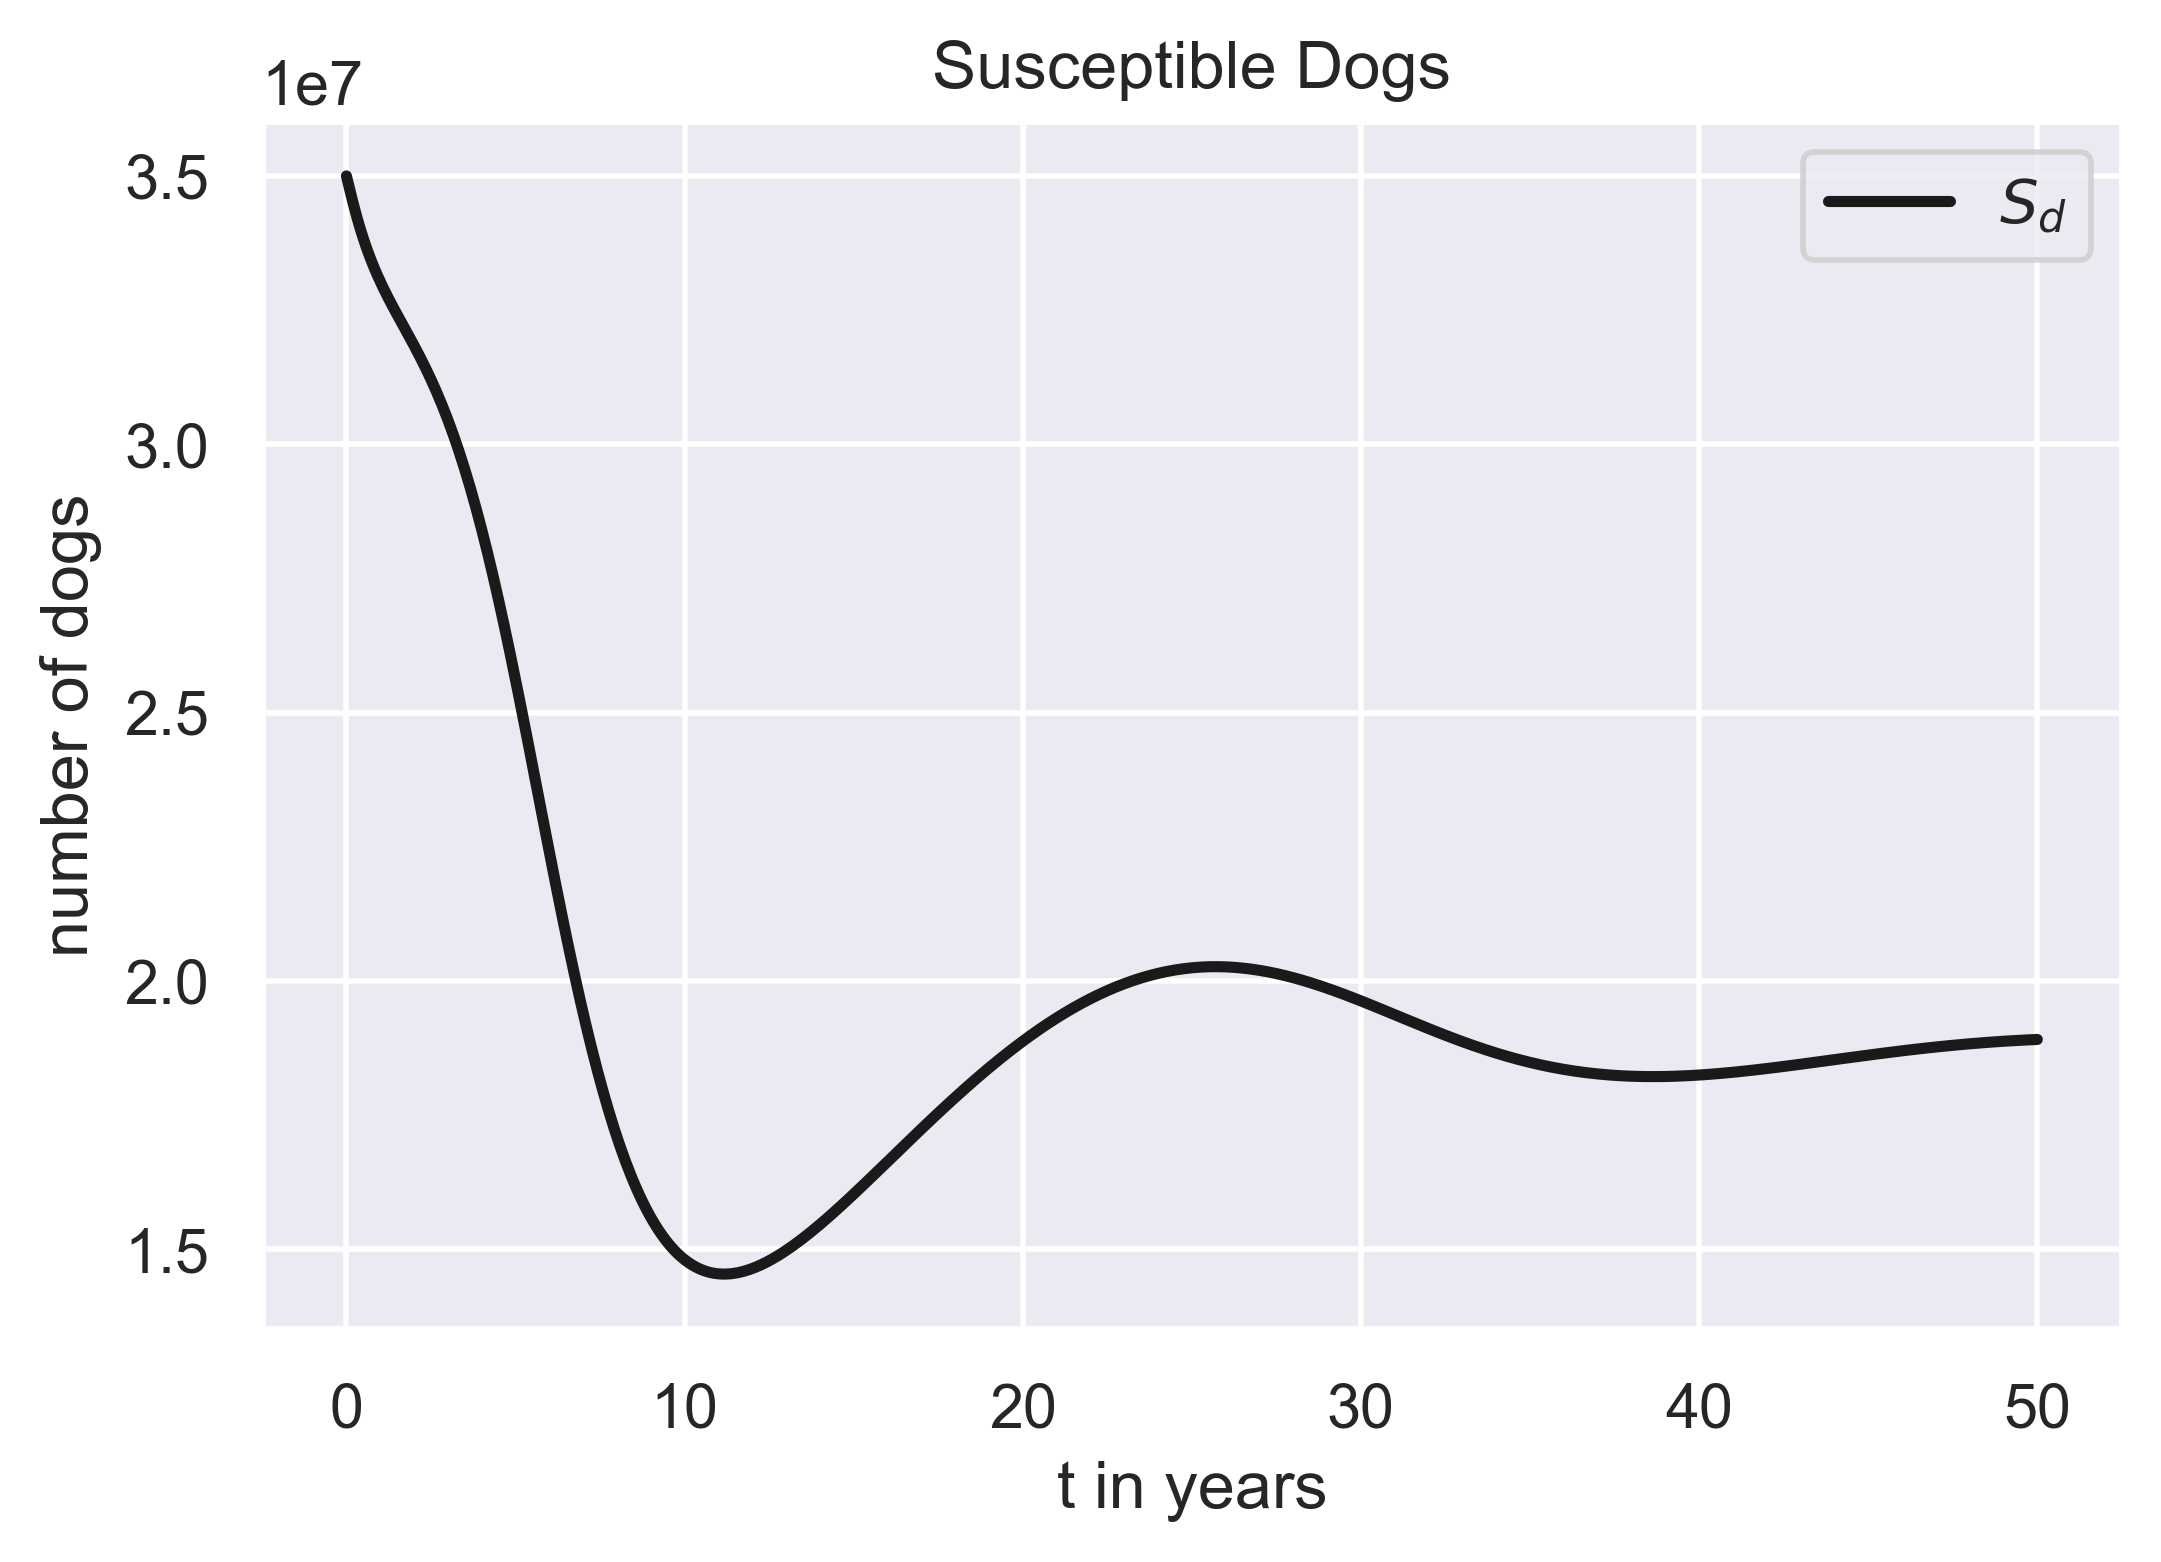

In [75]:
fig = plt.figure(dpi=400)

plt.plot(Ps_solve_ivp.t,Ps_solve_ivp.y[0],'k-', linewidth=2.0) #


plt.xlabel("t in years")
plt.ylabel("number of dogs")
plt.title("Susceptible Dogs")
plt.legend(["$S_d$"])
plt.show()

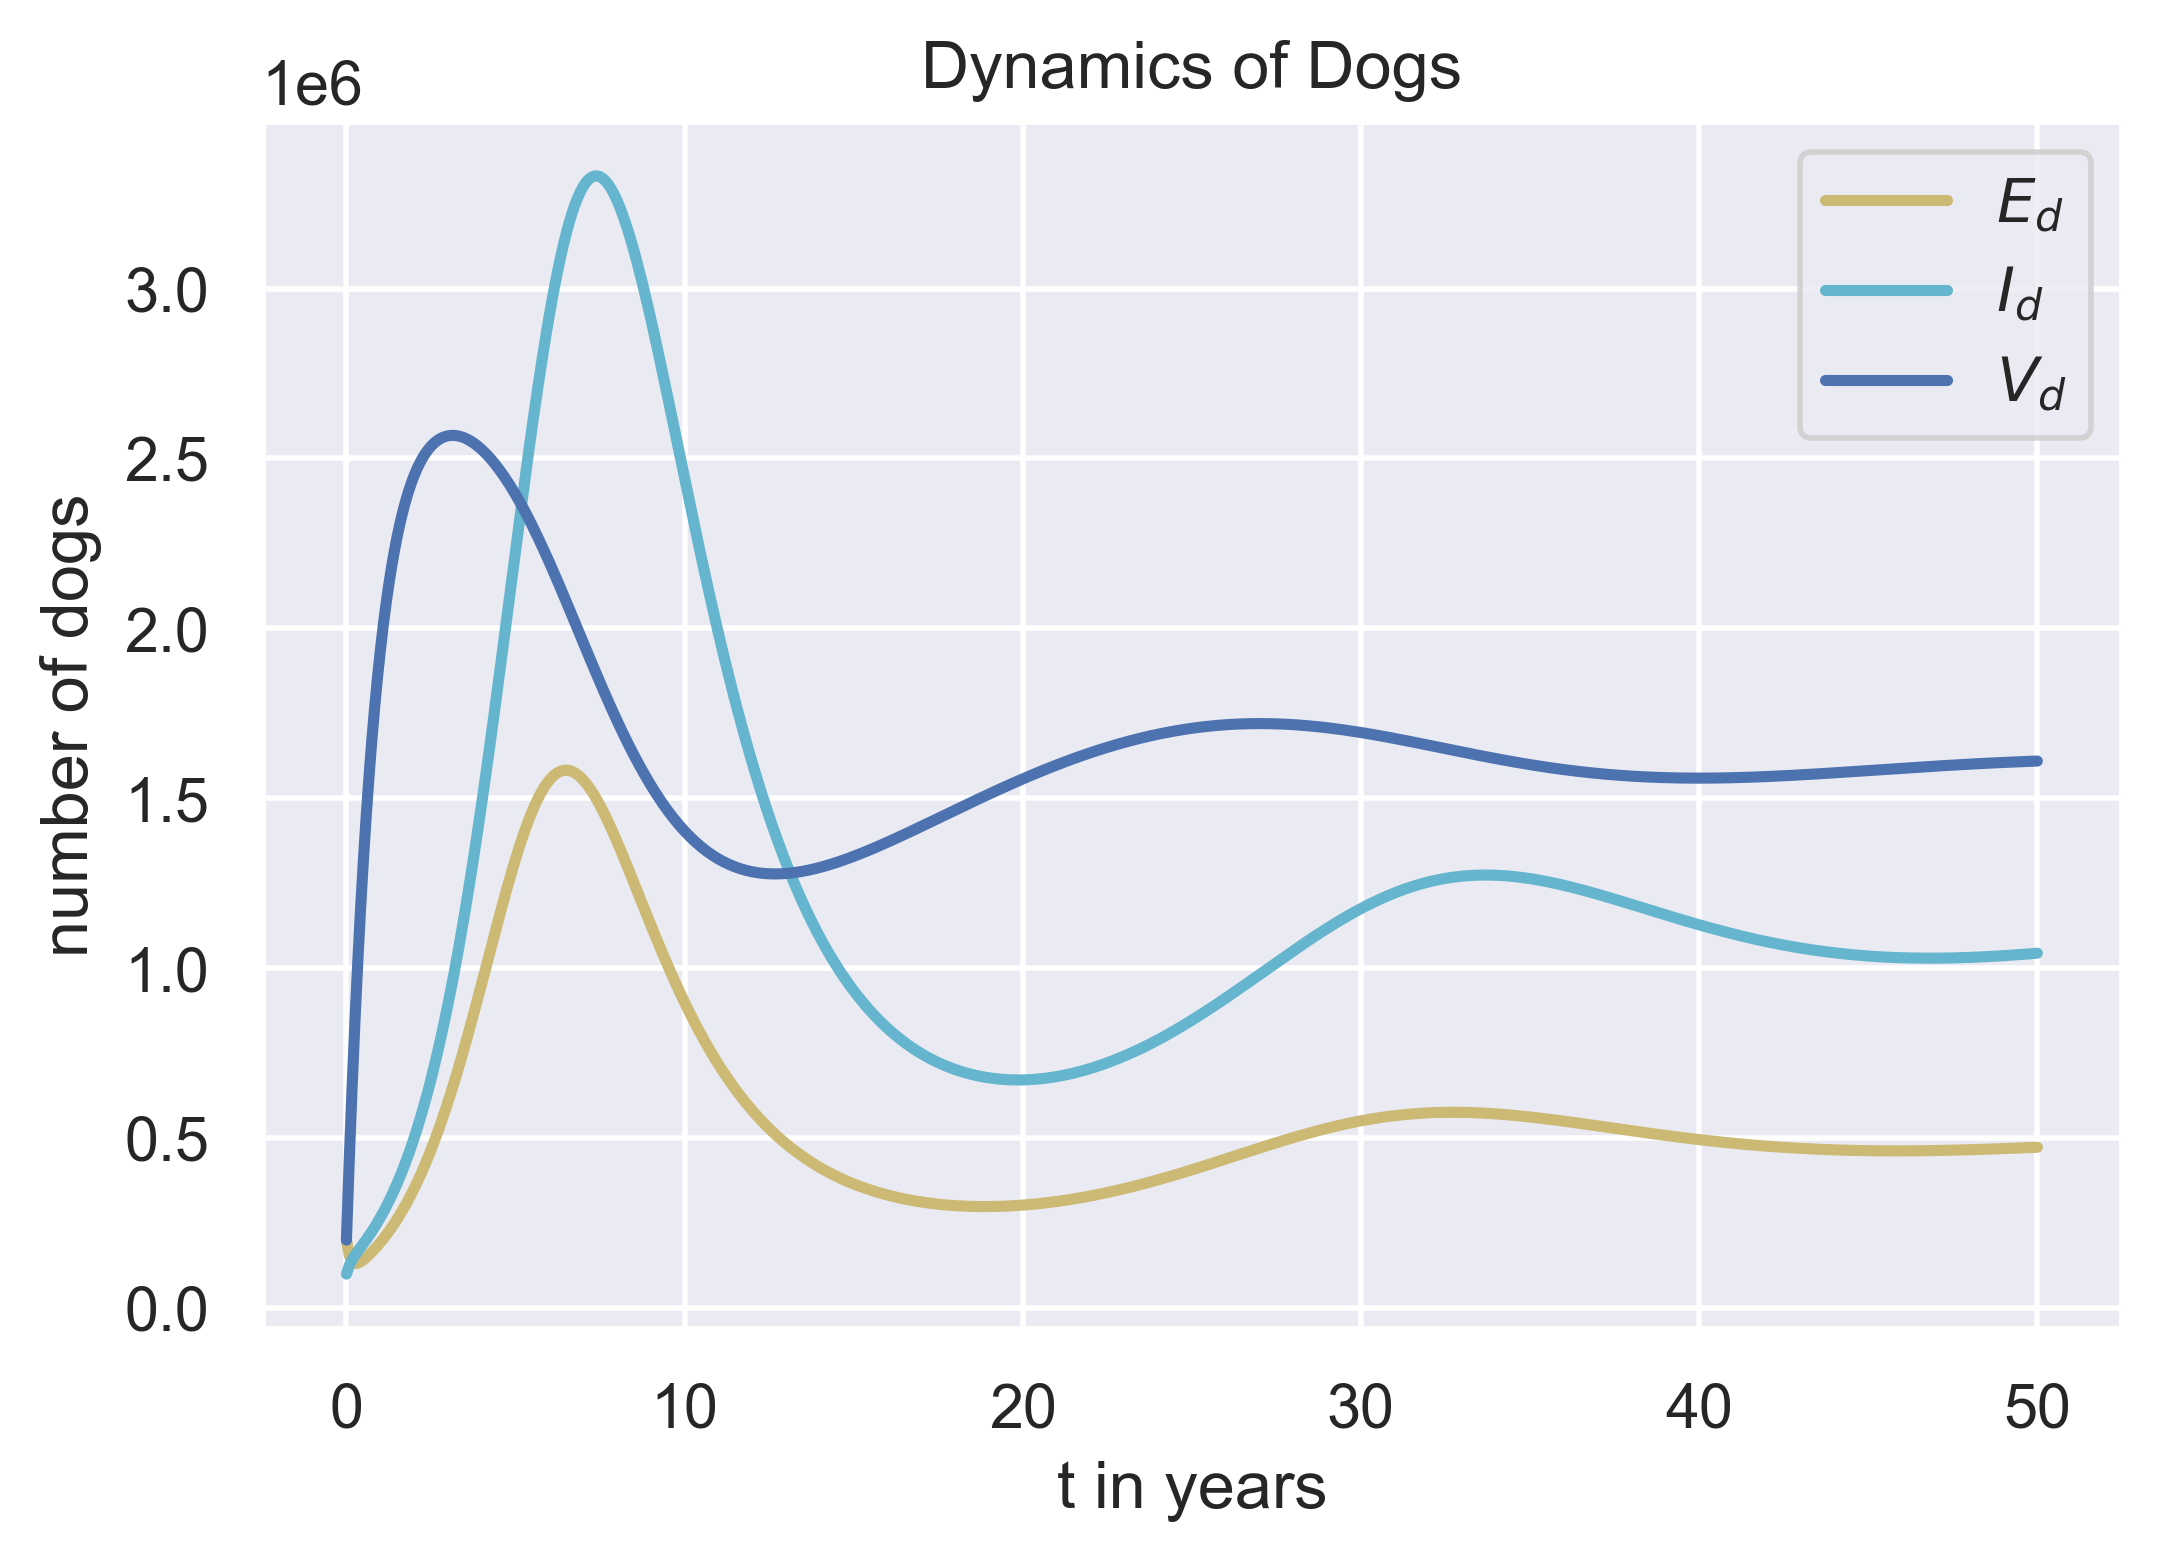

In [76]:
fig = plt.figure(dpi=400)
plt.plot(Ps_solve_ivp.t,Ps_solve_ivp.y[1],'y-', linewidth=2.0) #
plt.plot(Ps_solve_ivp.t,Ps_solve_ivp.y[2],'c-', linewidth=2.0) #
plt.plot(Ps_solve_ivp.t,Ps_solve_ivp.y[4],'b-', linewidth=2.0) #

plt.xlabel("t in years")
plt.ylabel("number of dogs")
plt.title("Dynamics of Dogs")
plt.legend(["$E_d$","$I_d$","$V_d$"])
plt.show()

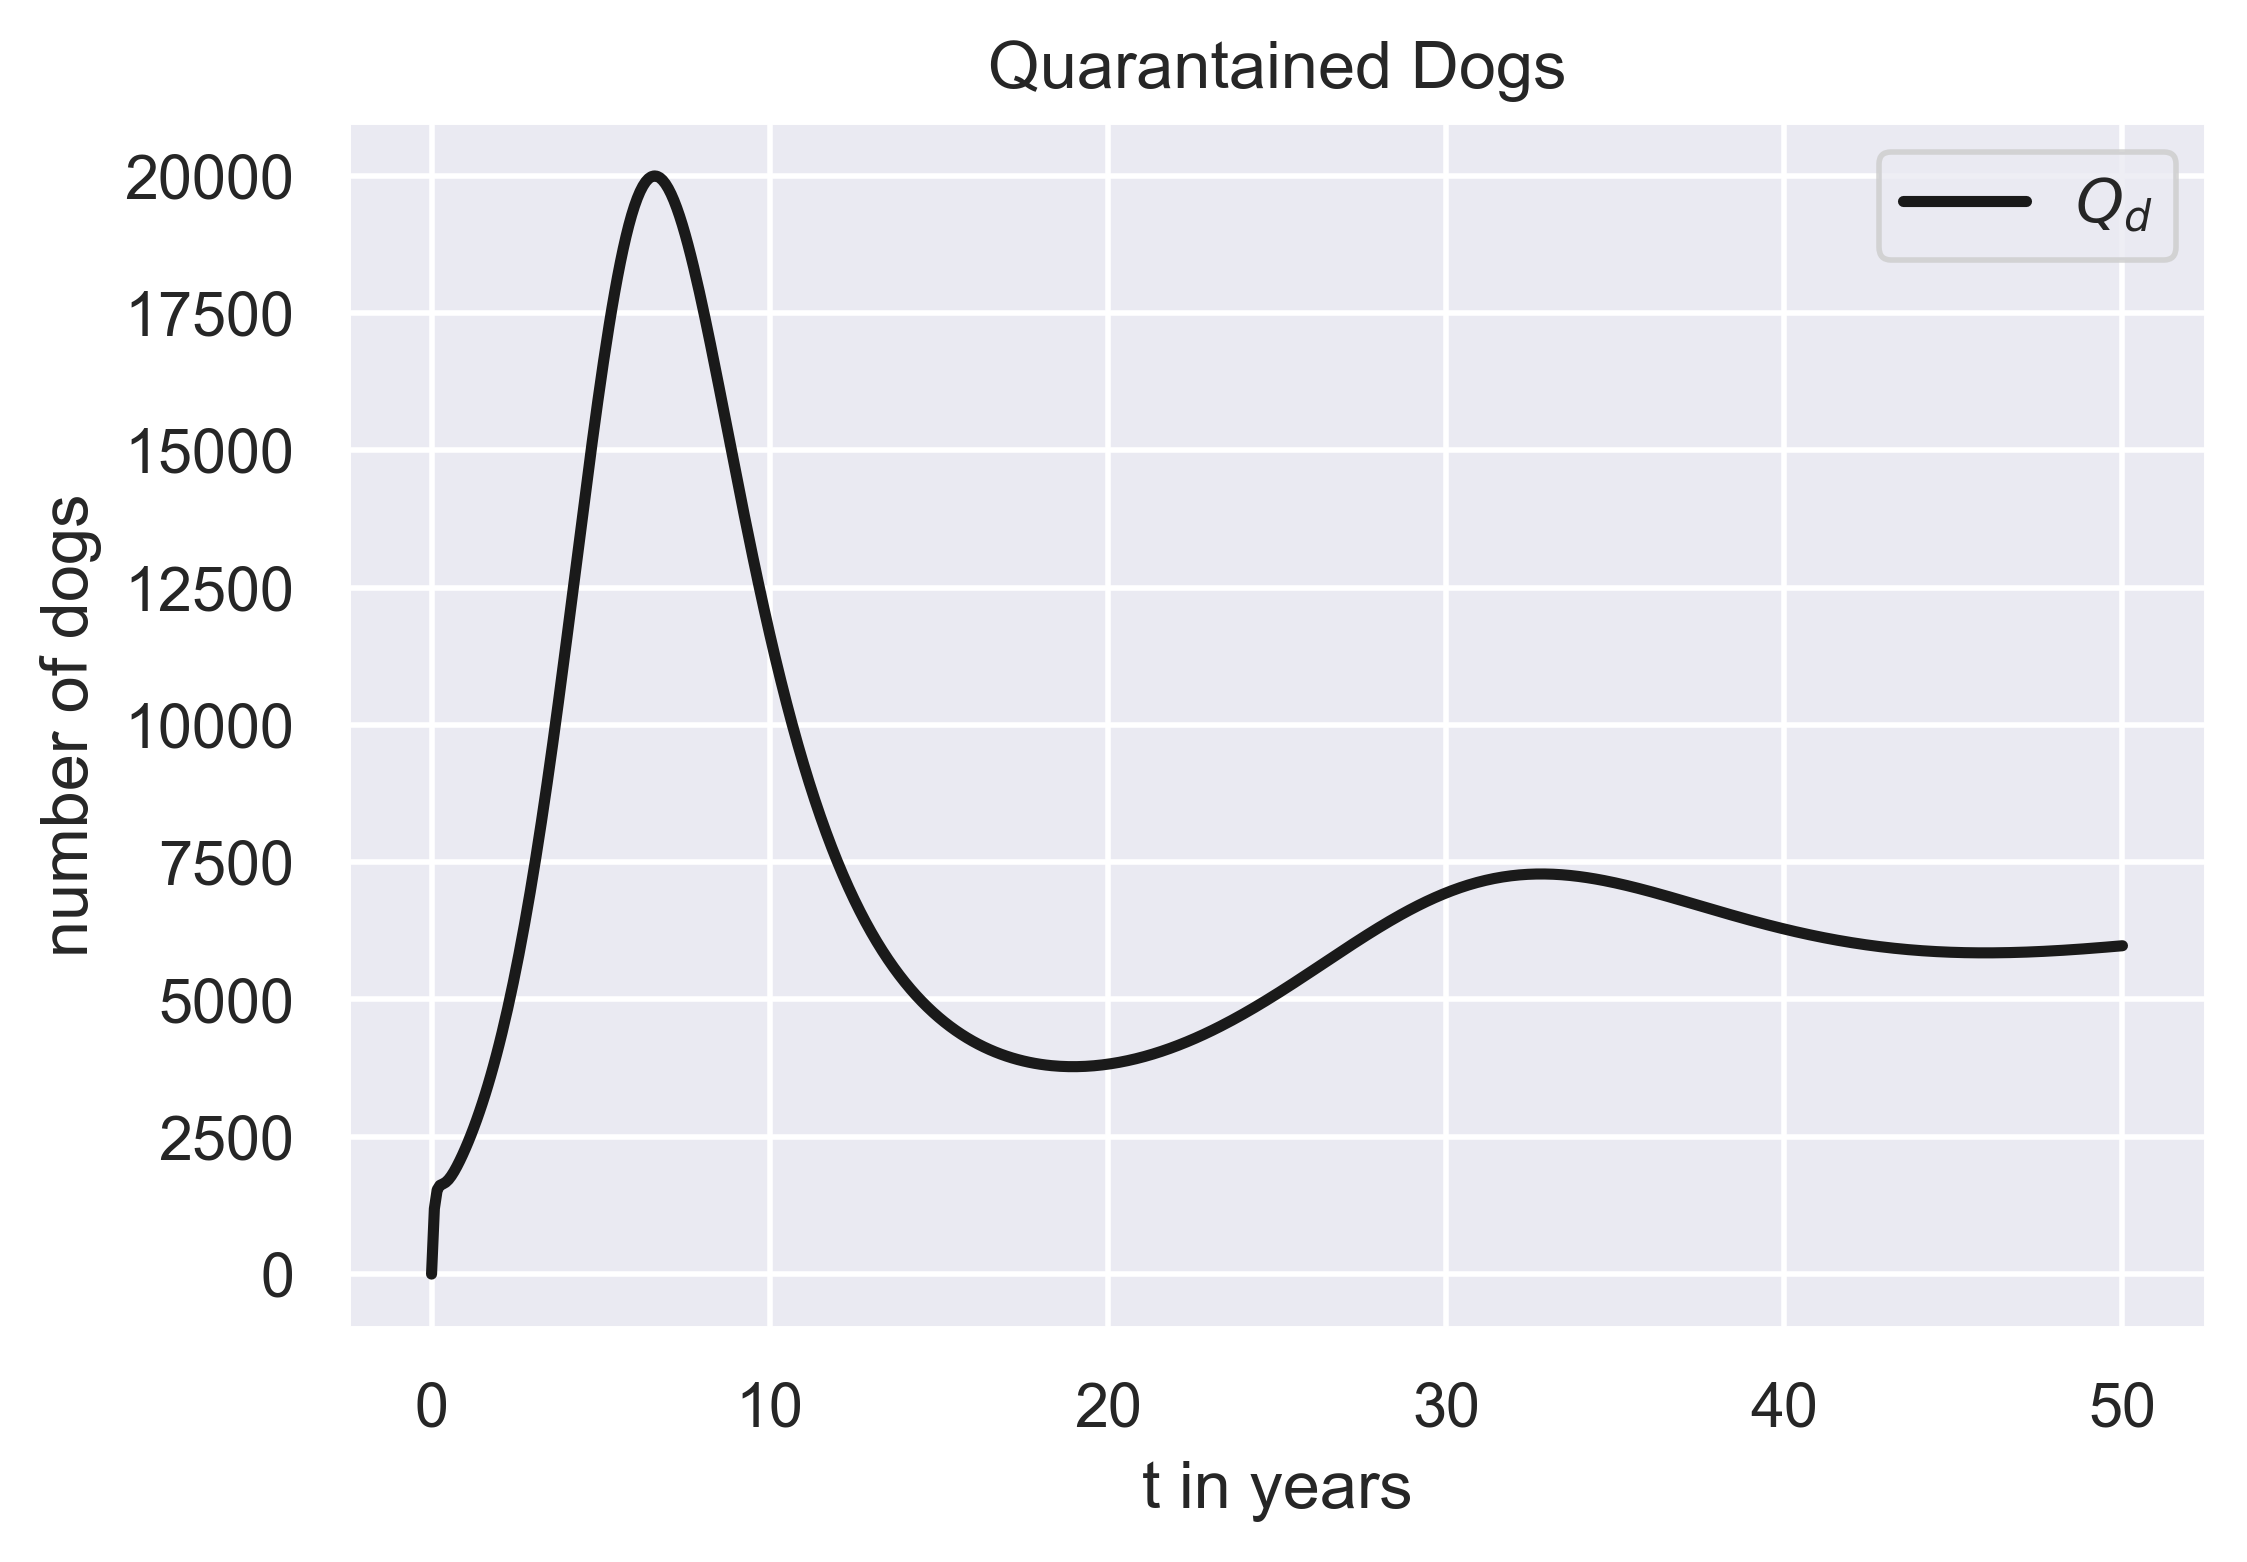

In [77]:
fig = plt.figure(dpi=400)

plt.plot(Ps_solve_ivp.t,Ps_solve_ivp.y[3],'k-', linewidth=2.0) #


plt.xlabel("t in years")
plt.ylabel("number of dogs")
plt.title("Quarantained Dogs")
plt.legend(["$Q_d$"])
plt.show()

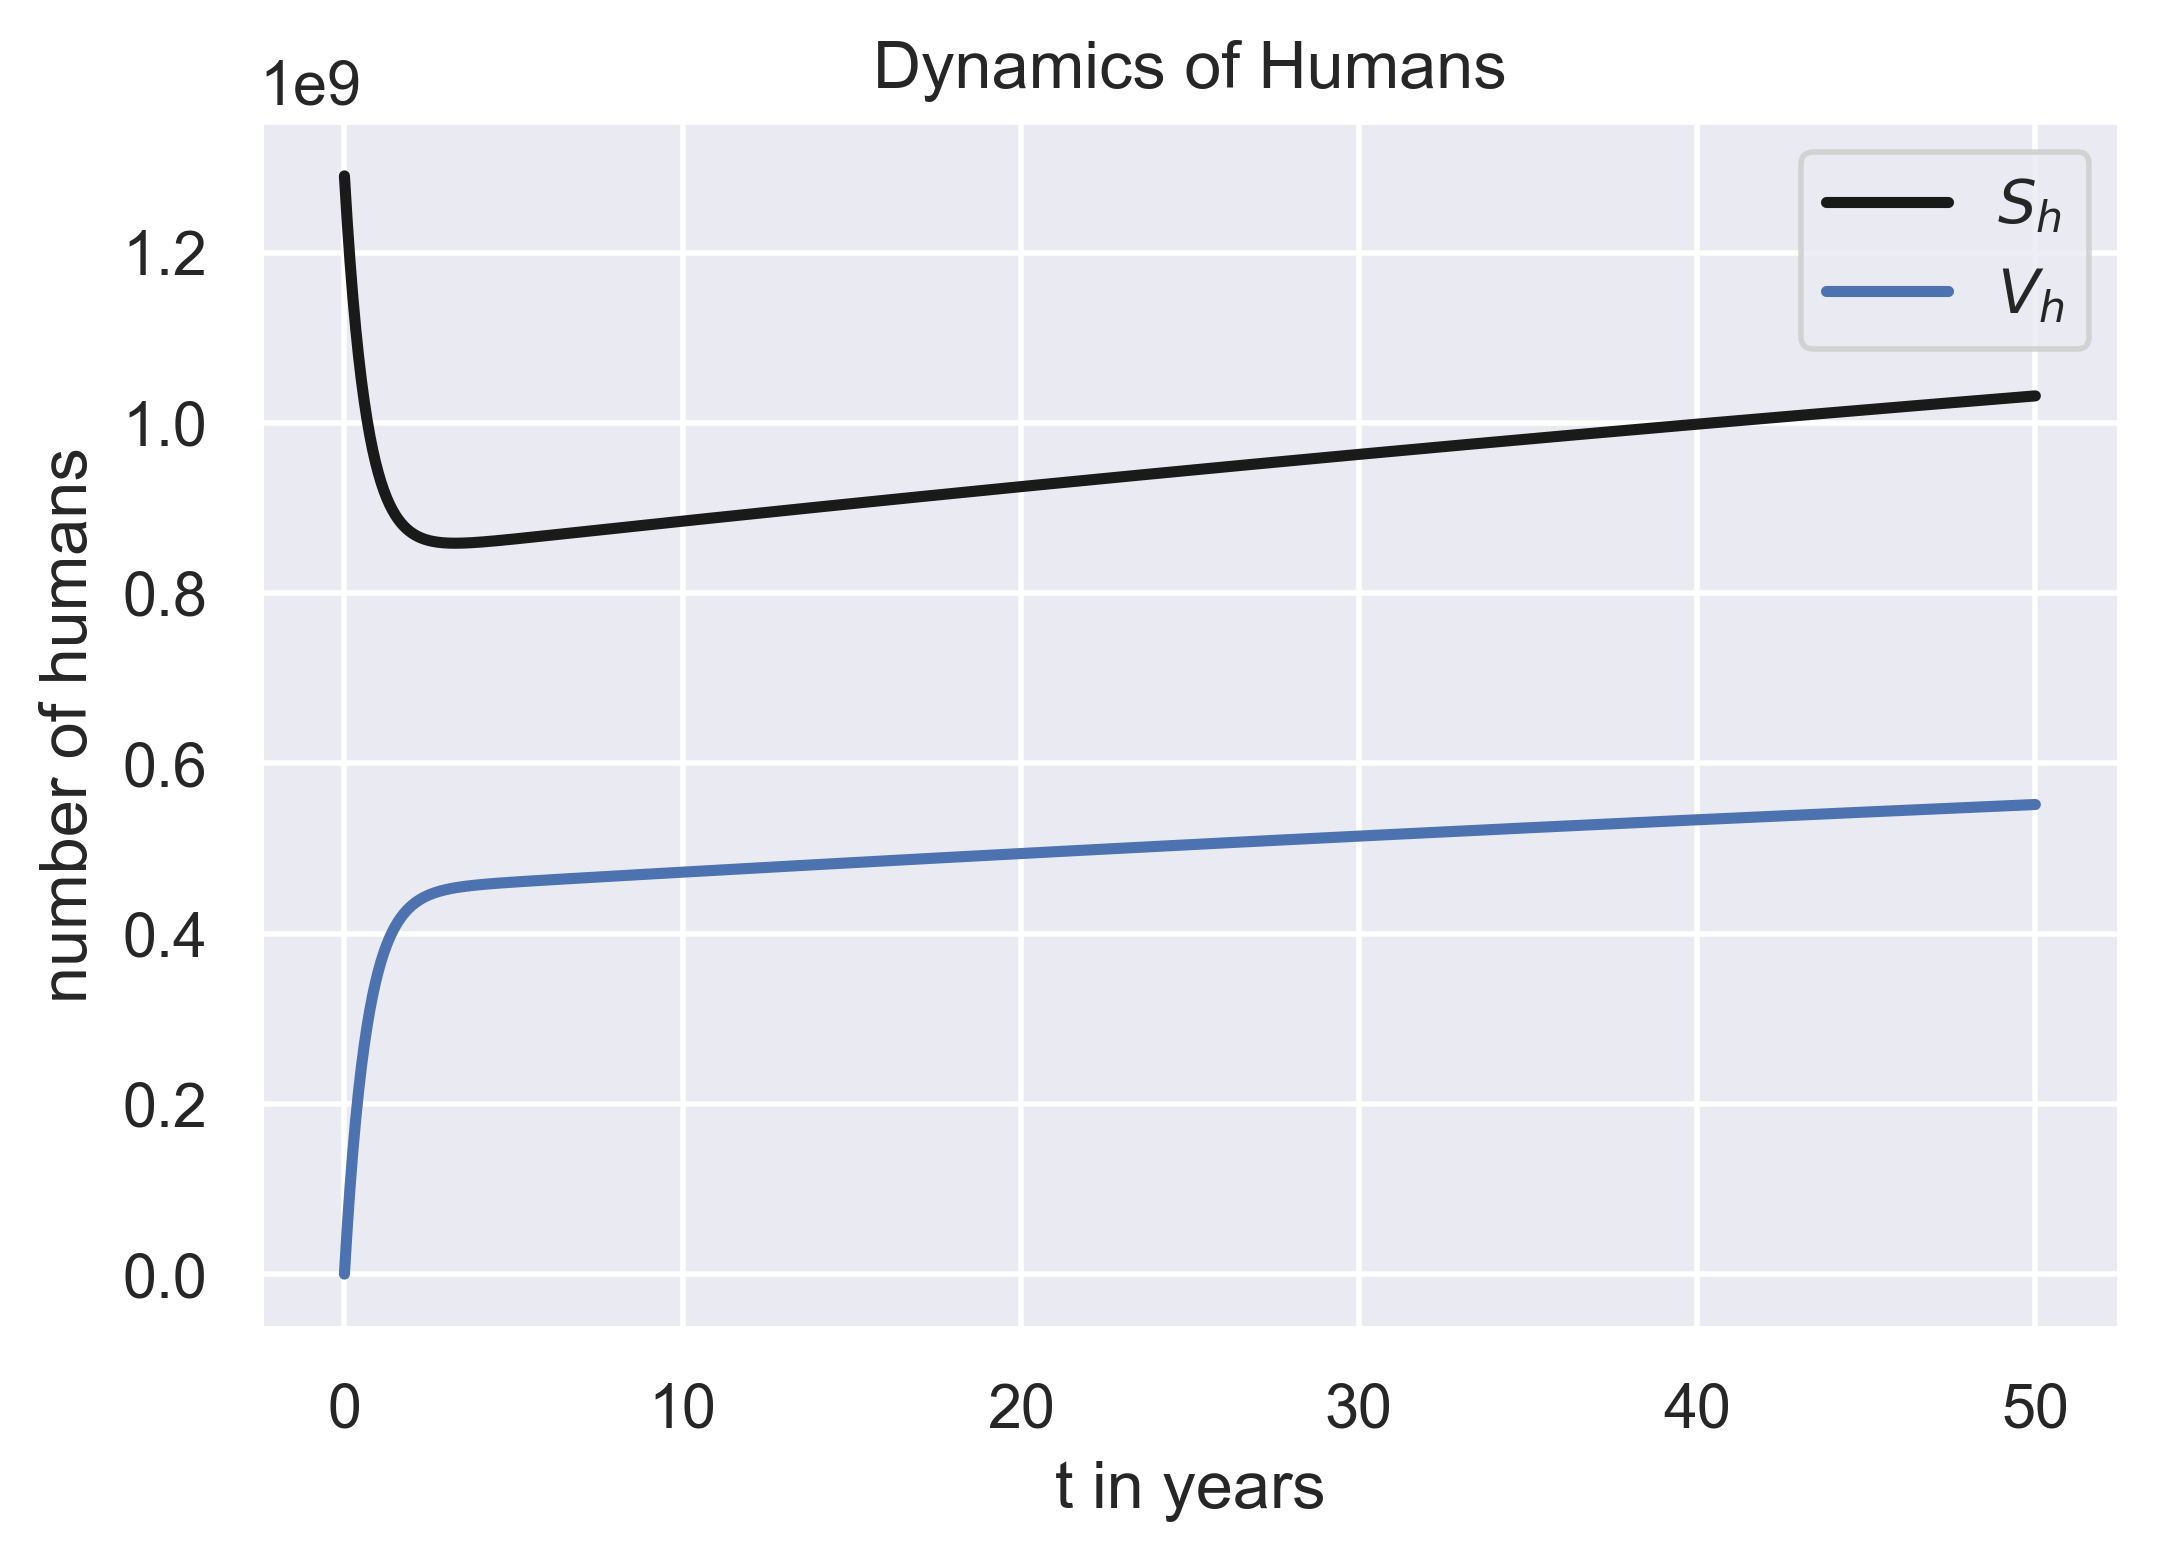

In [78]:
fig = plt.figure(dpi=400)
plt.plot(Ps_solve_ivp.t,Ps_solve_ivp.y[5],'k-', linewidth=2.0) #
plt.plot(Ps_solve_ivp.t,Ps_solve_ivp.y[8],'b-', linewidth=2.0) #


plt.xlabel("t in years")
plt.ylabel("number of humans")
plt.title("Dynamics of Humans")
plt.legend(["$S_h$","$V_h$"])
plt.show()

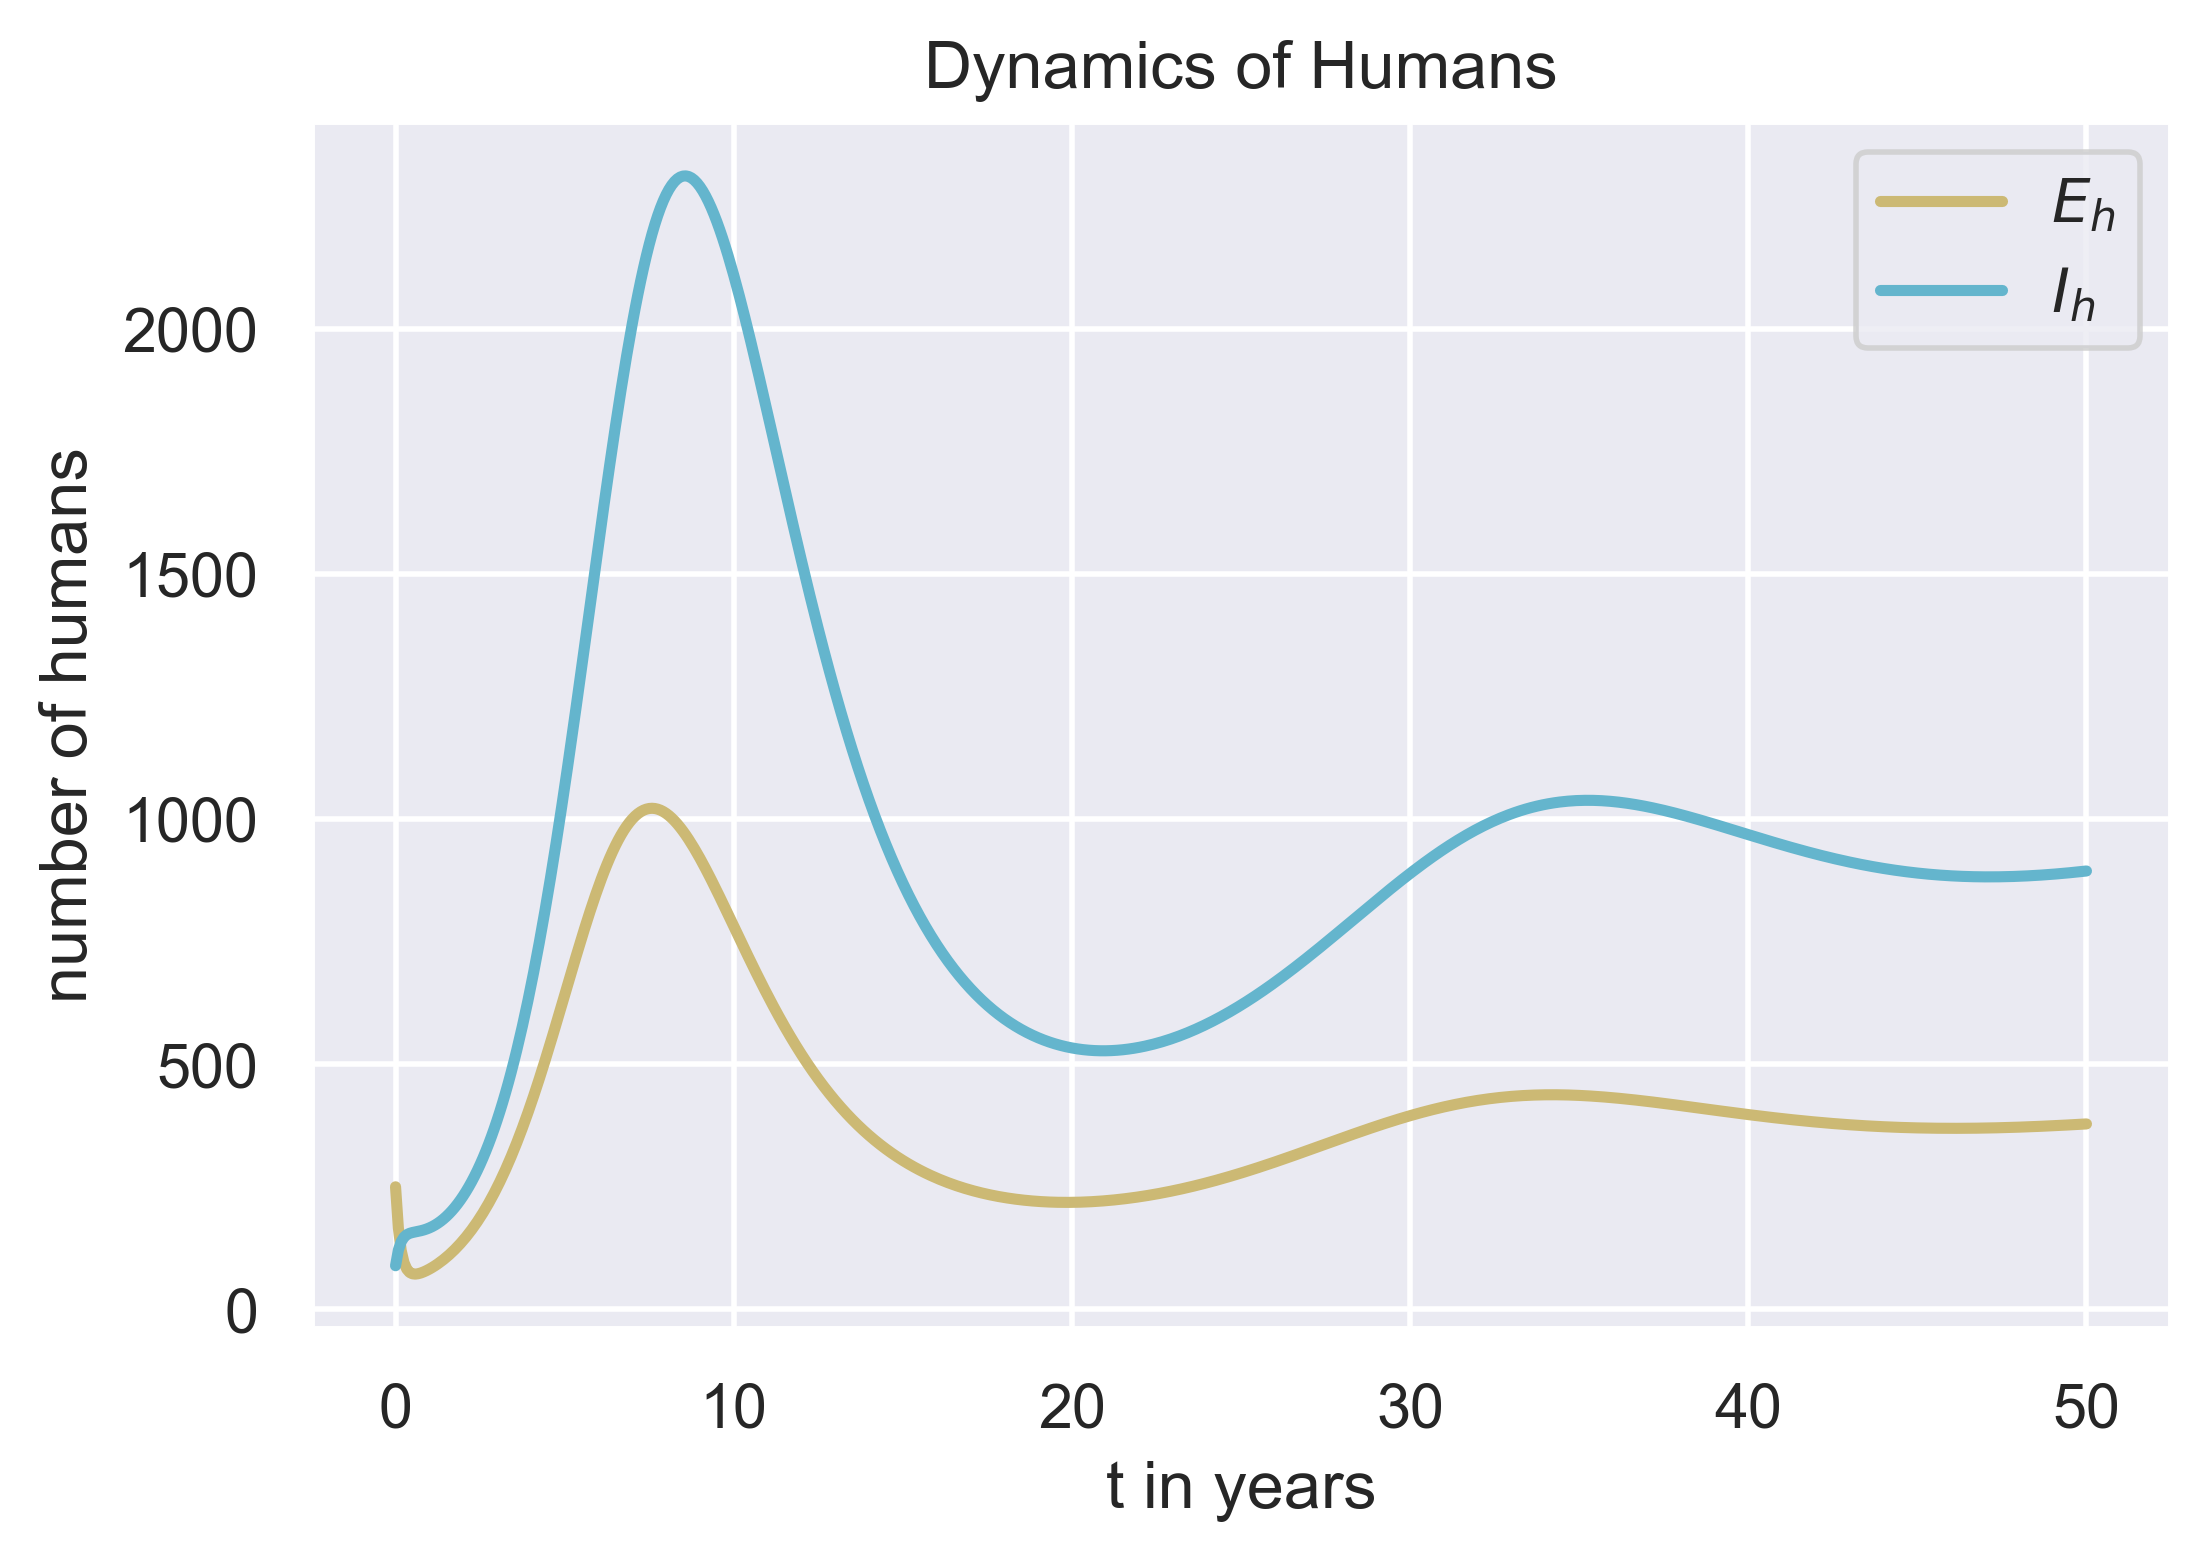

In [79]:
fig = plt.figure(dpi=400)
plt.plot(Ps_solve_ivp.t,Ps_solve_ivp.y[6],'y-', linewidth=2.0) #
plt.plot(Ps_solve_ivp.t,Ps_solve_ivp.y[7],'c-', linewidth=2.0) #


plt.xlabel("t in years")
plt.ylabel("number of humans")
plt.title("Dynamics of Humans")
plt.legend(["$E_h$","$I_h$"])
plt.show()

# Reproduction Number


In [80]:
Reproduction_Number = np.sqrt((γ_d*χ_d*β_dd*λ_d*(δ* ψ_d +μ_d+ α_d))/
							(N_d*μ_d*(μ_d+μ_rd)*(μ_e+γ_d+σ_d+μ_d+ψ_d)*(μ_d+ψ_d+α_d)))

In [81]:
Reproduction_Number

1.3586107314911686

# Model from Paper

In [83]:
from ast import Lambda
from audioop import mul
from random import betavariate
from types import LambdaType

from pyparsing import alphanums


def dP2_dt(t, P):
    # Here P is a vector such that S=P[0], E=P[1], ... . This function returns [S', E', ...]
    S_d, E_d, I_d, V_d,    S_h,E_h,I_h,V_h = P


    dS_d = λ_d -μ_d*S_d-(β_d*I_d*S_d) -ψ_d*S_d + γ_d*(1-χ_d)*E_d +α_d*V_d
    dE_d = (β_d*I_d*(S_d)) - γ_d*E_d -μ_d*E_d -ψ_d*E_d
    dI_d = γ_d*χ_d*E_d -μ_d*I_d - μ_rd*I_d
    dV_d = -μ_d*V_d + ψ_d*(S_d+E_d) -α_d*V_d
    
    dS_h = λ_h -μ_h*S_h-(β_h*I_d*S_h) + γ_h*(1-χ_h)*E_h +α_h*V_h 
    dE_h = (β_h*I_d*(S_h)) - γ_h*E_h -μ_h*E_h -ψ_h*E_h
    dI_h = γ_h*χ_h*E_h -μ_h*I_h - μ_rh*I_h
    dV_h = -μ_h*V_h -α_h*V_h +ψ_h*E_h
    
    return [dS_d, dE_d, dI_d, dV_d, dS_h, dE_h, dI_h, dV_h]

In [84]:
E_d = 2e5
I_d = 1e5
V_d = 2e5

E_h = 250
I_h = 89
V_h = 2e5

S_d = 3.5e7 
S_h = 1.29e9 

P0 = [S_d, E_d, I_d, V_d,    #dogs
     S_h, E_h, I_h, V_h]    #humans
ts = np.linspace(0, 10, 1500)


In [85]:
Ps_solve_ivp2 = solve_ivp(dP2_dt, t_span=(0,50), y0=P0, method="BDF", rtol=1e-8)

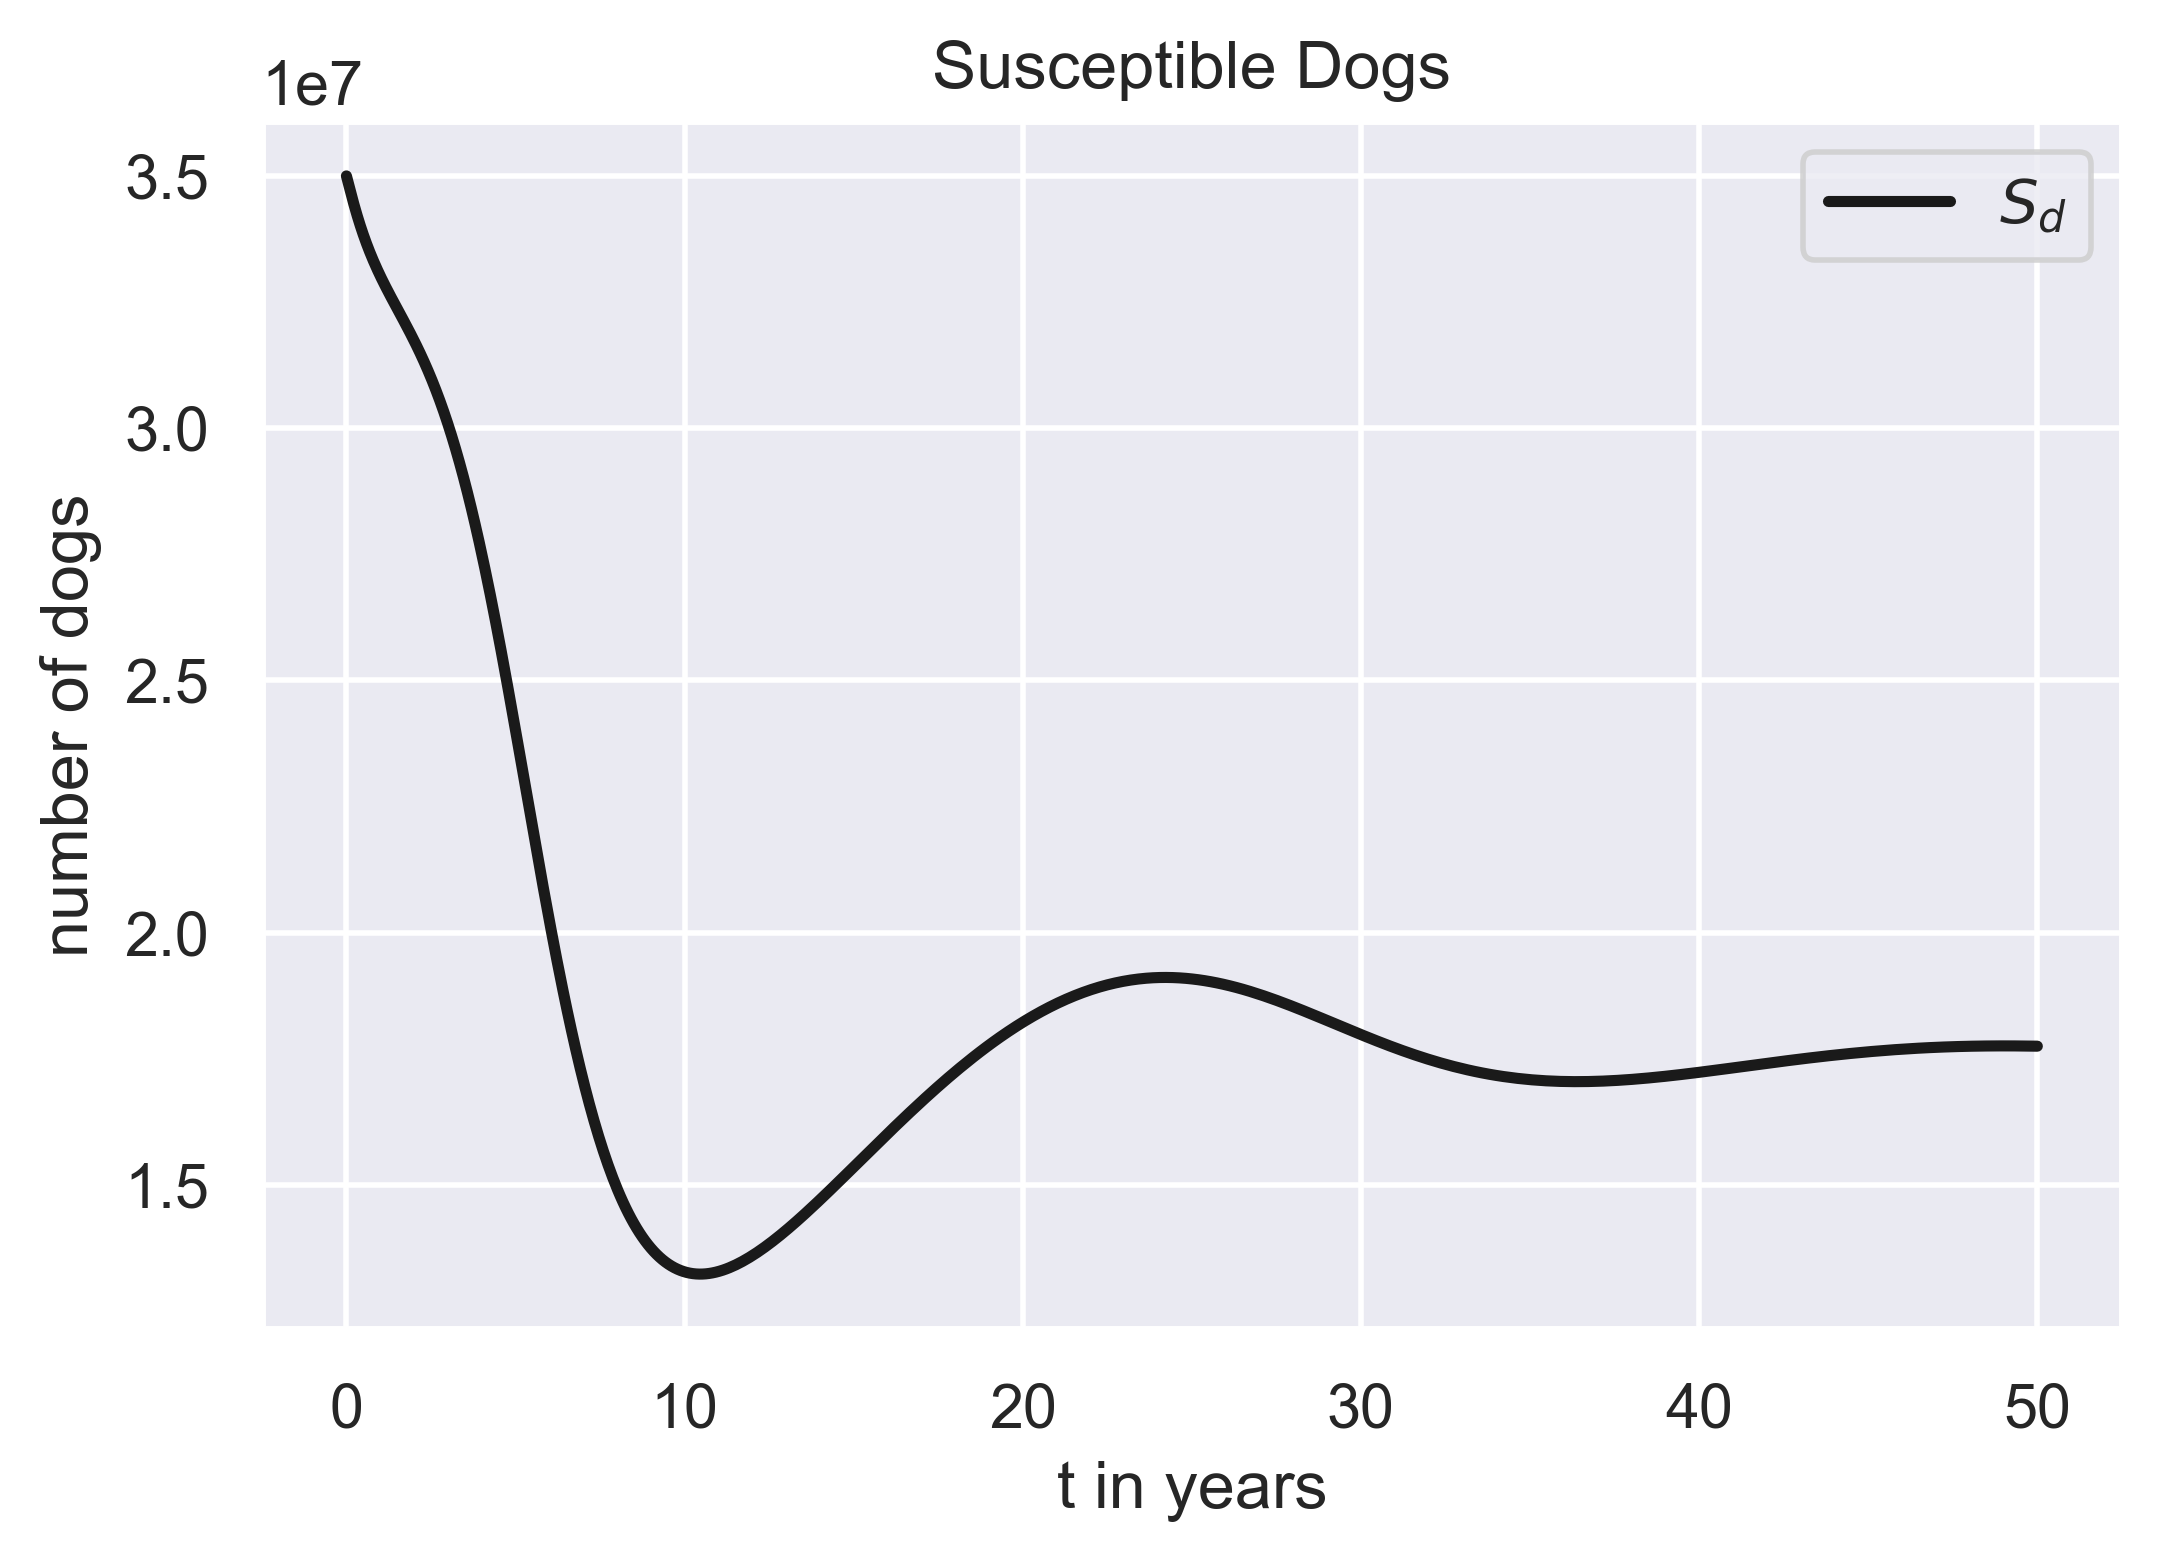

In [87]:
fig = plt.figure(dpi=400)

plt.plot(Ps_solve_ivp2.t,Ps_solve_ivp2.y[0],'k-', linewidth=2.0) #

plt.xlabel("t in years")
plt.ylabel("number of dogs")
plt.title("Susceptible Dogs")
plt.legend(["$S_d$"])
plt.show()


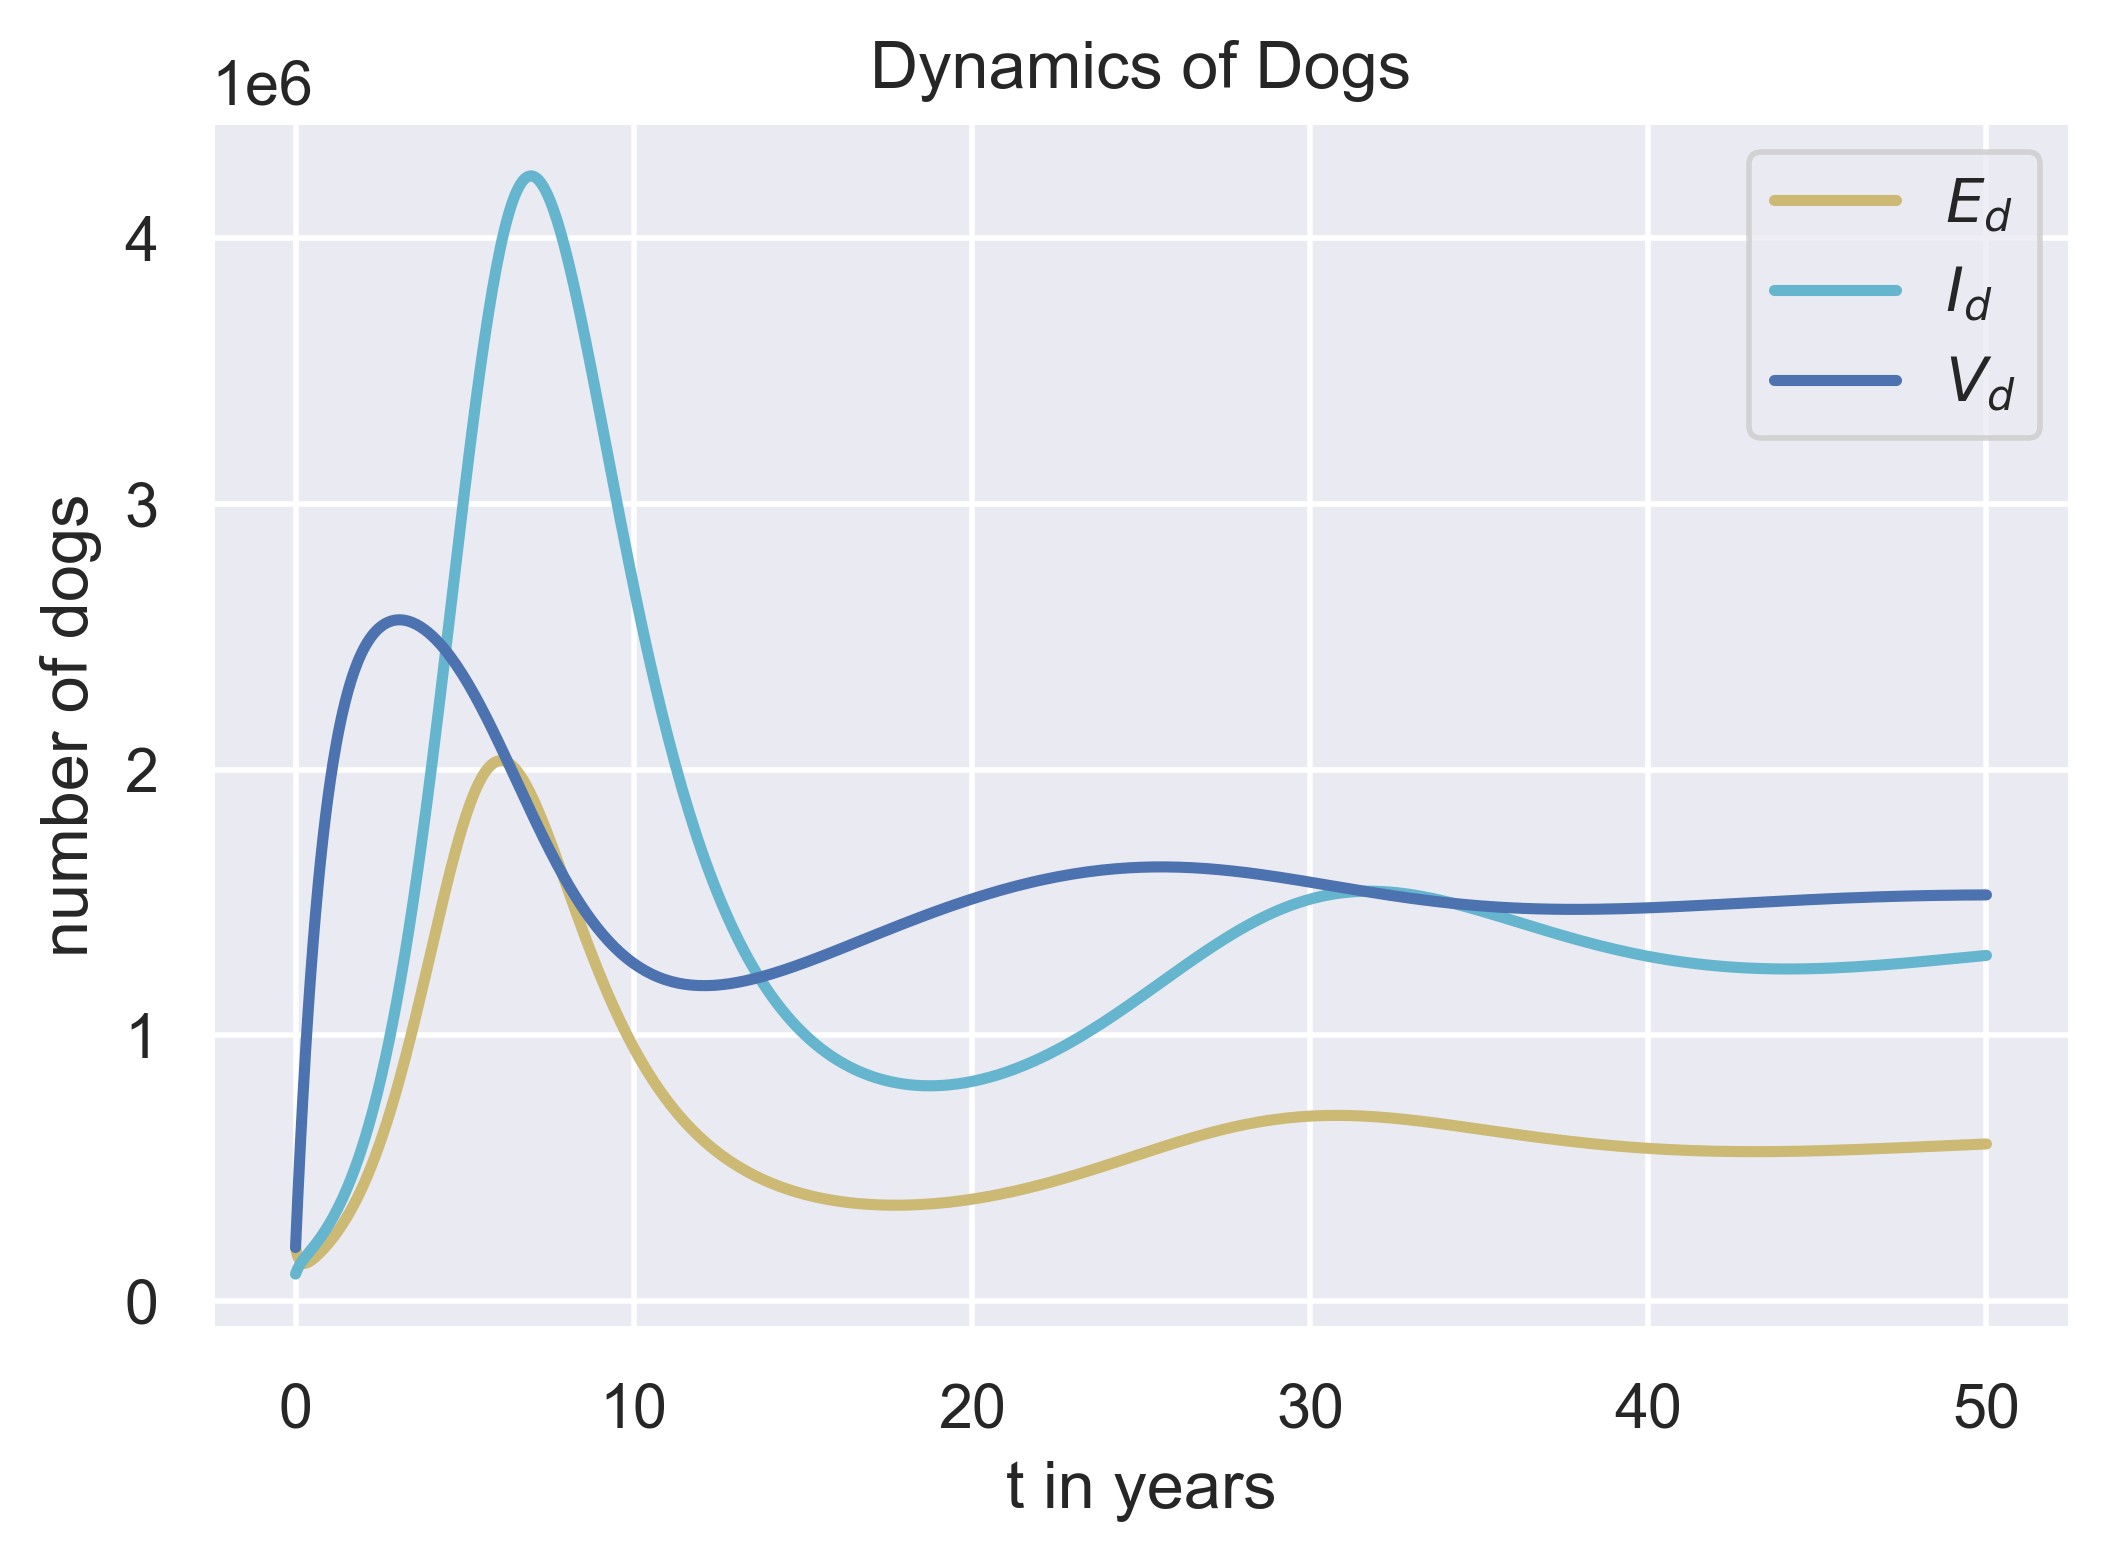

In [88]:
fig = plt.figure(dpi=400)
plt.plot(Ps_solve_ivp2.t,Ps_solve_ivp2.y[1],'y-', linewidth=2.0) #
plt.plot(Ps_solve_ivp2.t,Ps_solve_ivp2.y[2],'c-', linewidth=2.0) #
plt.plot(Ps_solve_ivp2.t,Ps_solve_ivp2.y[3],'b-', linewidth=2.0) #

plt.xlabel("t in years")
plt.ylabel("number of dogs")
plt.title("Dynamics of Dogs")
plt.legend(["$E_d$","$I_d$","$V_d$"])
plt.show()

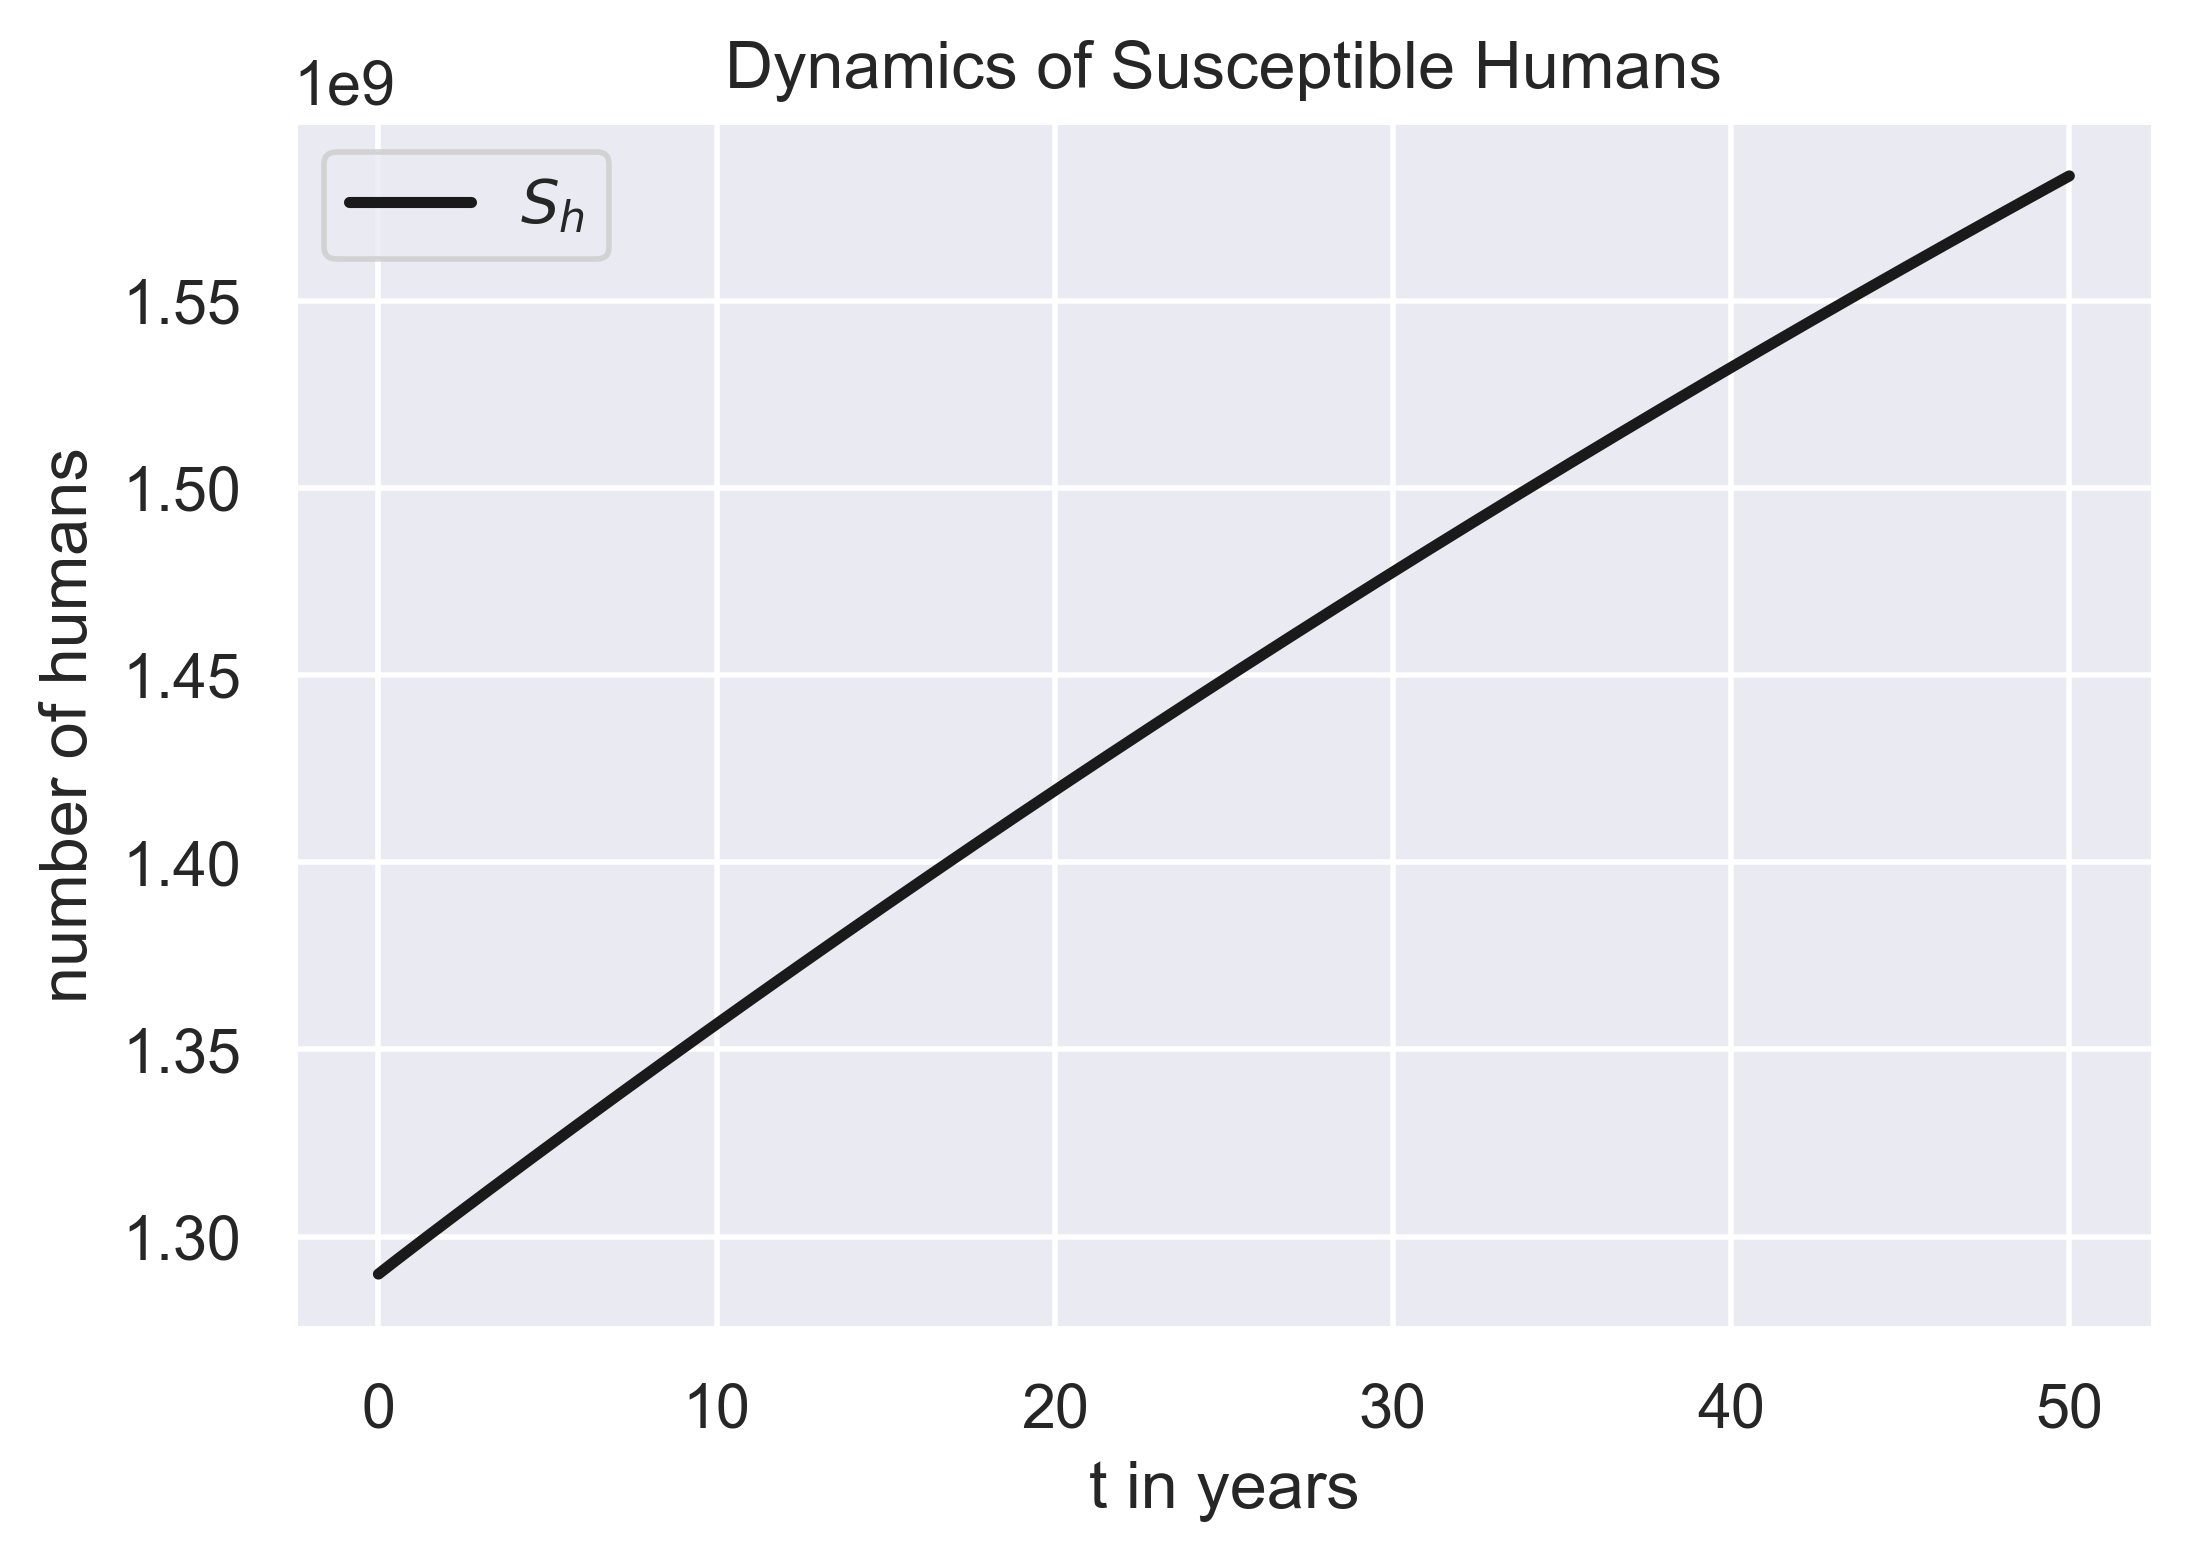

In [89]:
fig = plt.figure(dpi=400)
plt.plot(Ps_solve_ivp2.t,Ps_solve_ivp2.y[4],'k-', linewidth=2.0) #

plt.xlabel("t in years")
plt.ylabel("number of humans")
plt.title("Dynamics of Susceptible Humans")
plt.legend(["$S_h$"])
plt.show()

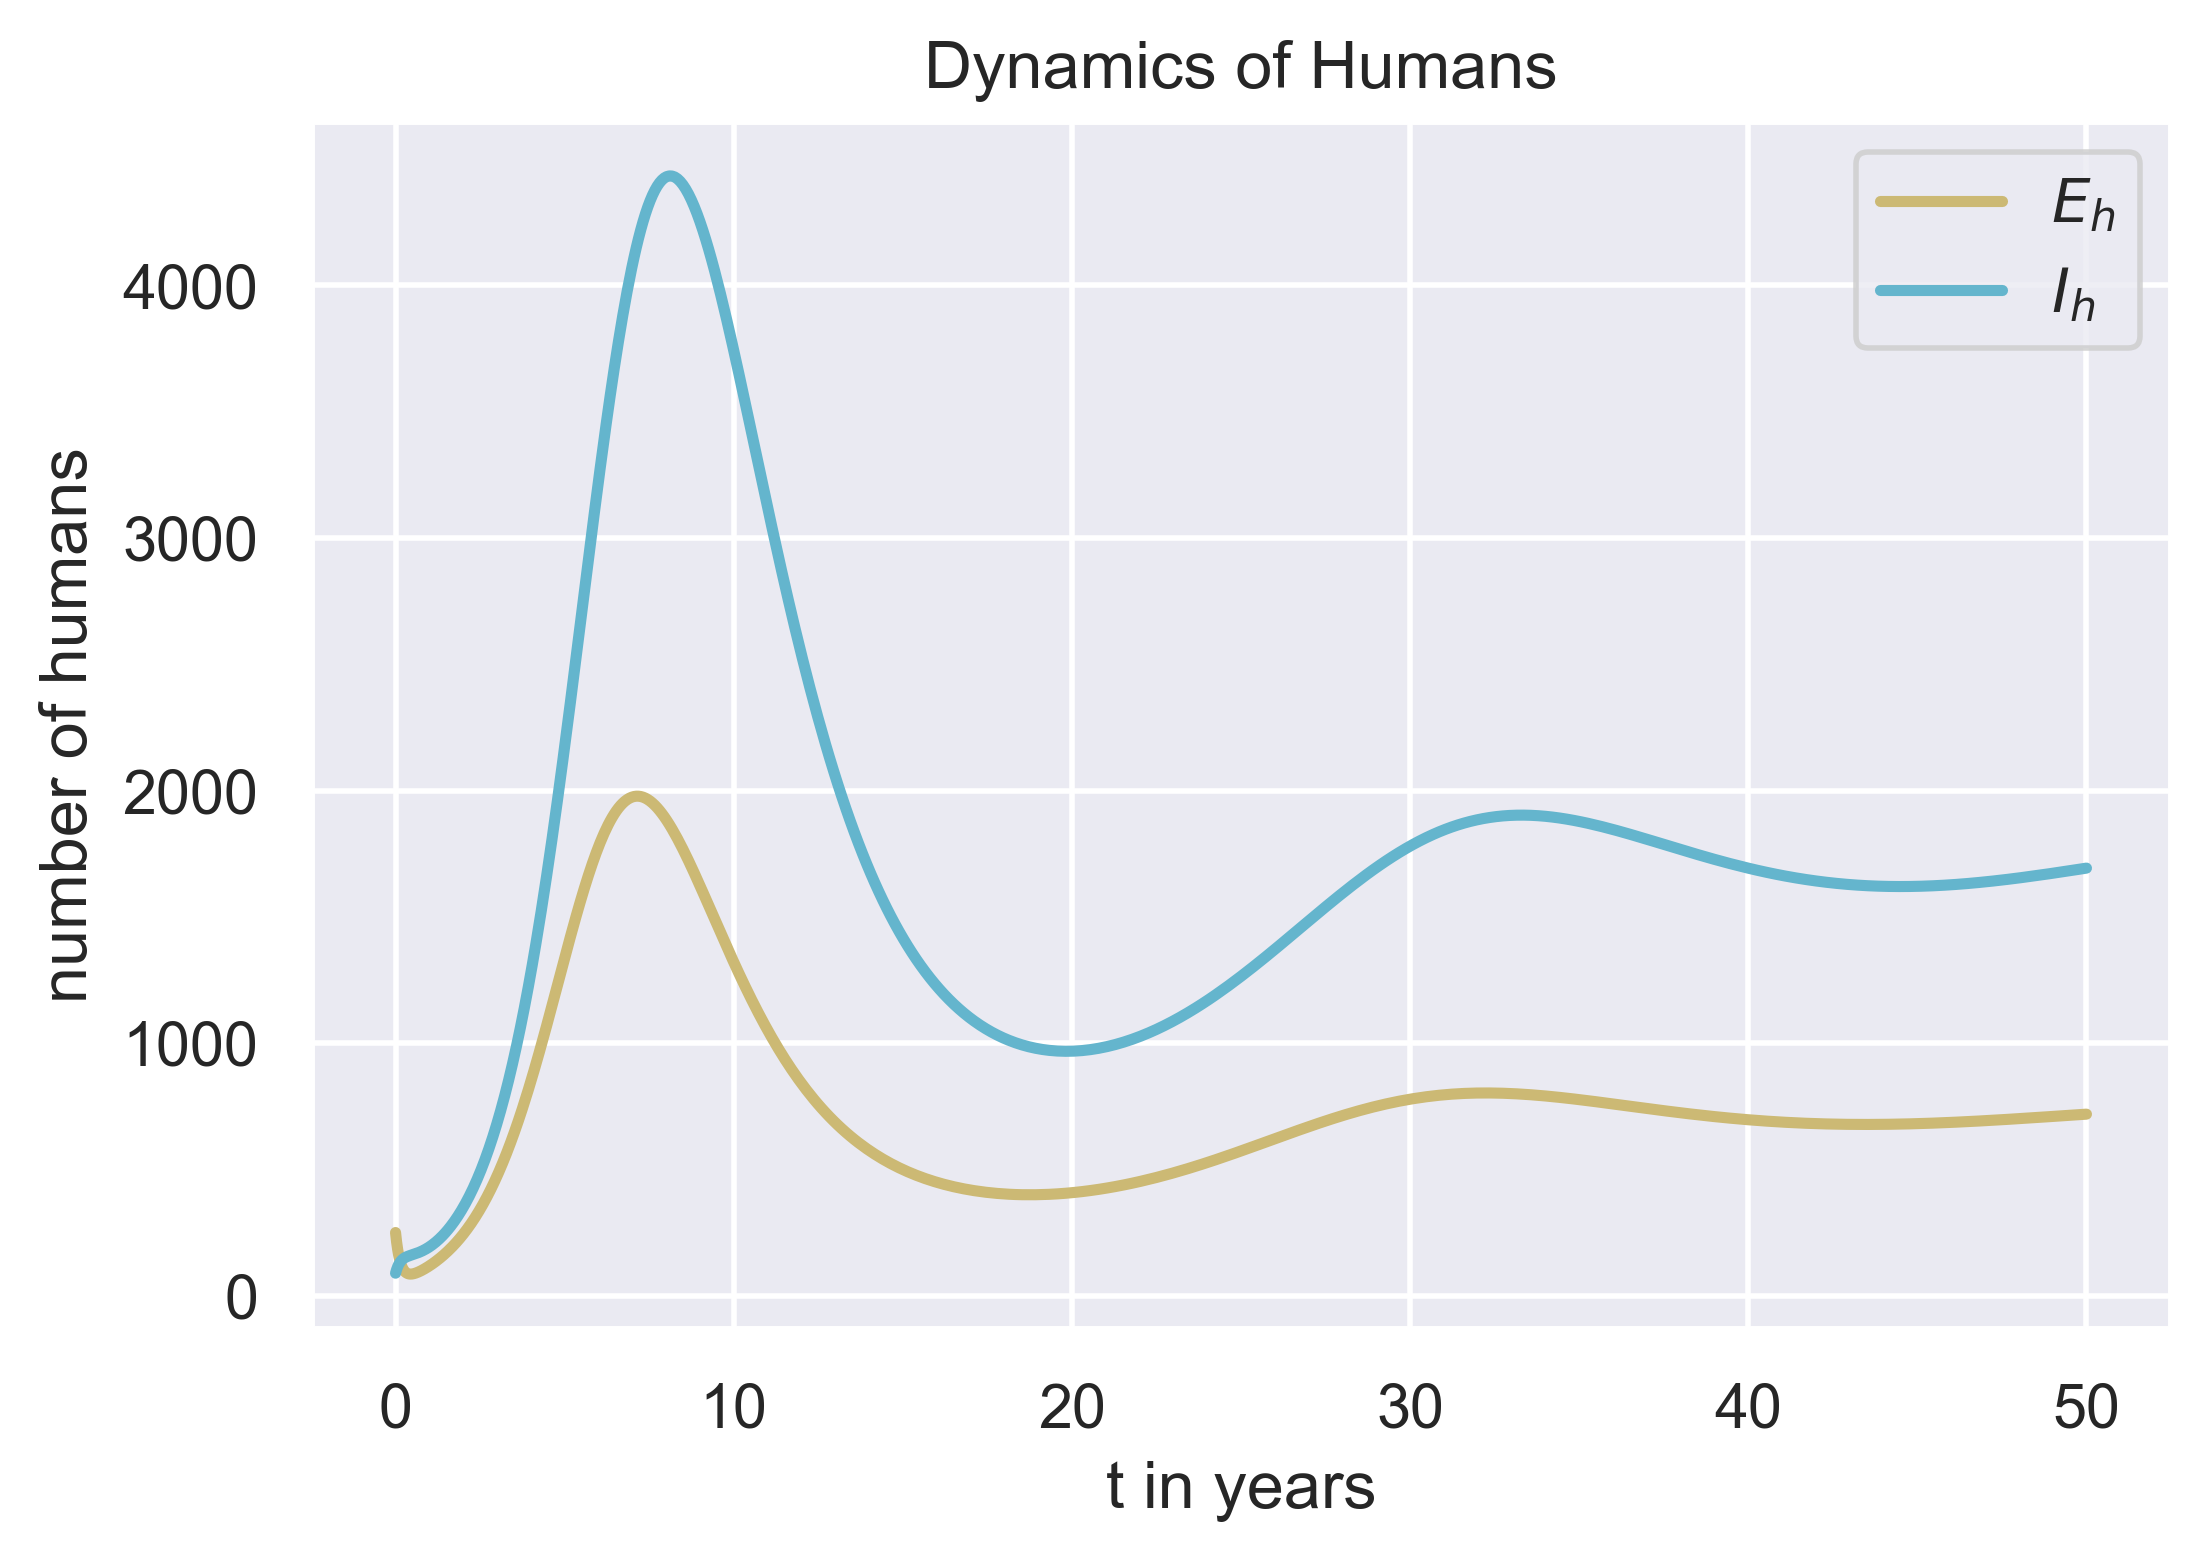

In [90]:
fig = plt.figure(dpi=400)
plt.plot(Ps_solve_ivp2.t,Ps_solve_ivp2.y[5],'y-', linewidth=2.0) #
plt.plot(Ps_solve_ivp2.t,Ps_solve_ivp2.y[6],'c-', linewidth=2.0) #



plt.xlabel("t in years")
plt.ylabel("number of humans")
plt.title("Dynamics of Humans")
plt.legend(["$E_h$","$I_h$"])
plt.show()

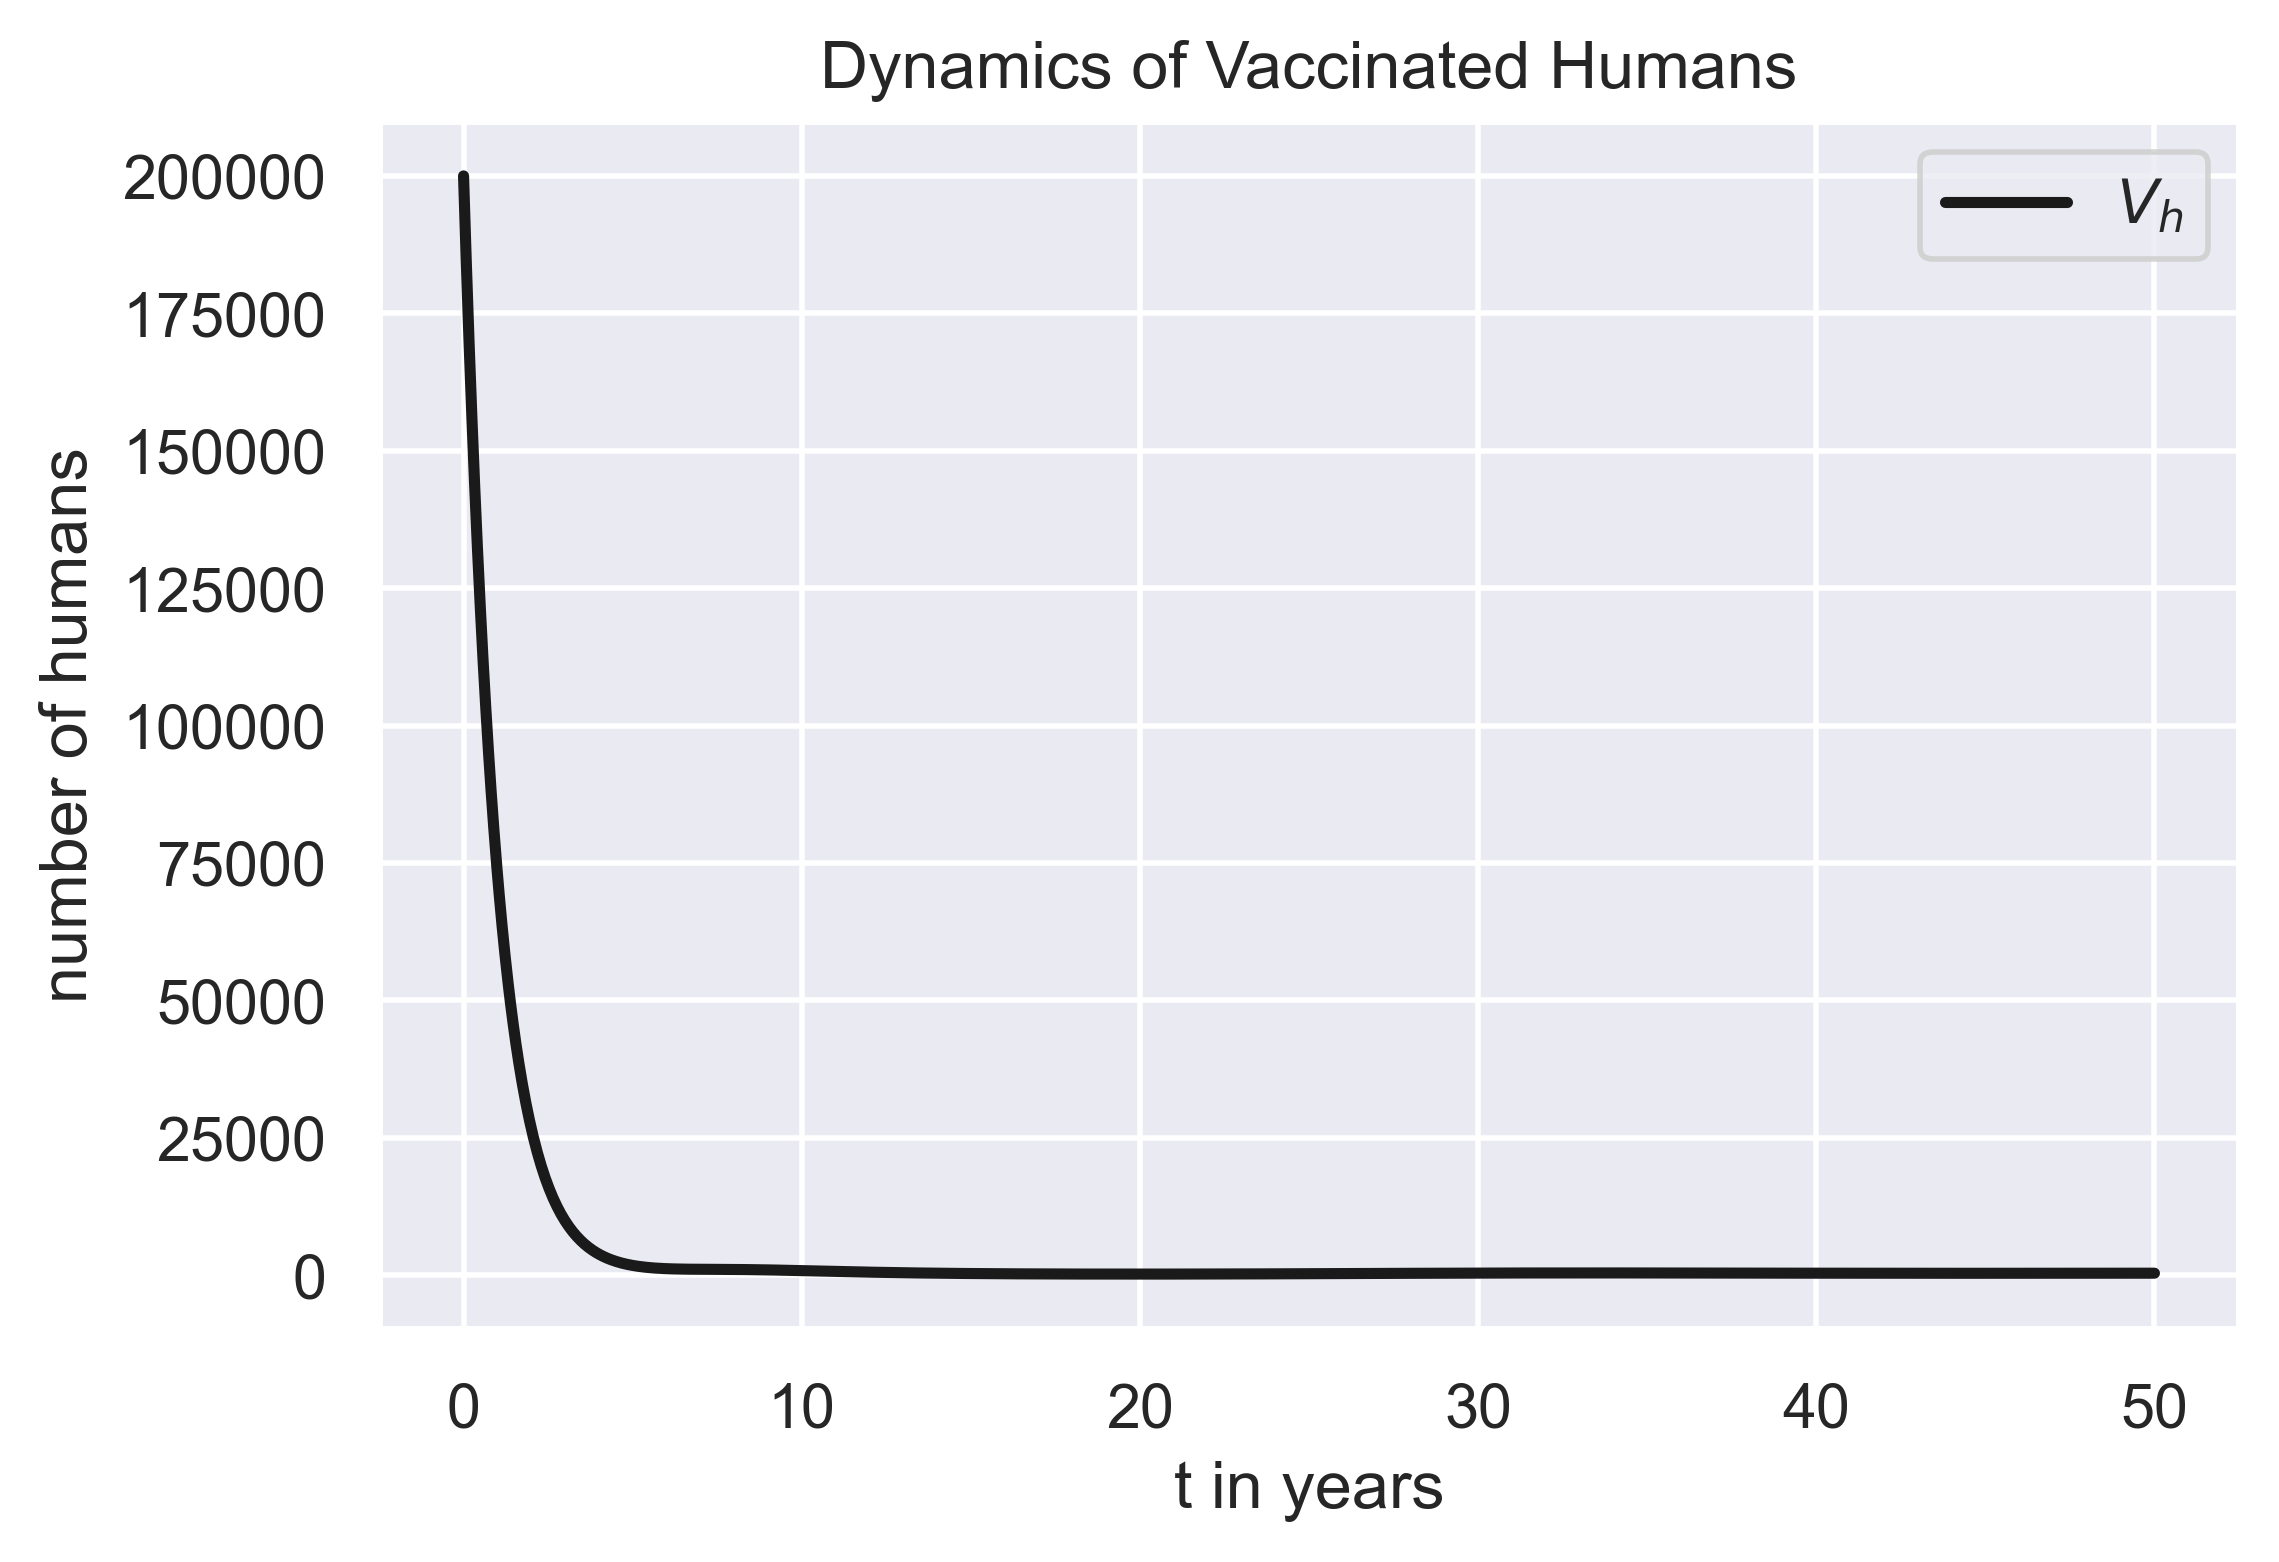

In [91]:
fig = plt.figure(dpi=400)
plt.plot(Ps_solve_ivp2.t,Ps_solve_ivp2.y[7],'k-', linewidth=2.0) #

plt.xlabel("t in years")
plt.ylabel("number of humans")
plt.title("Dynamics of Vaccinated Humans")
plt.legend(["$V_h$"])
plt.show()

# Equilibria and Stability

In [92]:
from sympy.solvers import solve
from sympy import Symbol
from sympy import symbols, Eq

In [93]:
S_d, E_d, I_d, Q_d, V_d,    S_h,E_h,I_h,V_h = symbols("S_d E_d I_d Q_d V_d S_h E_h I_h V_h")


dS_d = λ_d/N_d -μ_d*S_d-(β_dd*I_d*S_d)/(1-Q_d) -ψ_d*S_d + γ_d*(1-χ_d)*E_d +α_d*V_d +r_1*Q_d 
dE_d = -μ_e*E_d + (β_dd*I_d*(S_d+V_d*δ))/(1-Q_d) - γ_d*E_d -σ_d*E_d -μ_d*E_d -ψ_d*E_d
dI_d = γ_d*χ_d*E_d -μ_d*I_d - μ_rd*I_d
dQ_d = σ_d*E_d -r_1*Q_d -μ_d*Q_d -μ_e*Q_d - μ_rd*Q_d 
dV_d = -μ_d*V_d-(β_dd*I_d*V_d*δ)/(1-Q_d) + ψ_d*S_d -α_d*V_d +ψ_d*E_d 
    
dS_h = λ_h/N_h -μ_h*S_h-(β_dh*I_d*S_h)*N_d/N_h -ψ_h*S_h + γ_h*(1-χ_h)*E_h +α_h*V_h 
dE_h = (β_dh*I_d*(S_h+V_h*δ)*N_d)/N_h - γ_h*E_h -μ_h*E_h -ψ_h*E_h
dI_h = γ_h*χ_h*E_h -μ_h*I_h - μ_rh*I_h
dV_h = -μ_h*V_h-(β_dh*I_d*V_h*δ)*N_d/N_h + ψ_h*S_h -α_h*V_h +ψ_h*E_h




e1= Eq(dS_d,0)
e2= Eq(dE_d,0)
e3= Eq(dI_d,0)
e4= Eq(dQ_d,0)
e5= Eq(dV_d,0)
e6= Eq(dS_h,0)
e7= Eq(dE_h,0)
e8= Eq(dI_h,0)
e9= Eq(dV_h,0)


Equilibria = solve((e1,e2,e3,e4,e5,e6,e7,e8,e9), (S_d, E_d, I_d, Q_d, V_d, S_h, E_h, I_h, V_h), dict=True)
Equilibria

[{S_d: -2.85945150024947,
  E_d: -9.76394439859324,
  I_d: -21.6976542190961,
  Q_d: -0.123449542852736,
  V_d: 345.342361993743,
  S_h: 1.25804715590257,
  E_h: -0.000340785205626075,
  I_h: -0.000812521849297219,
  V_h: 0.674720188395215},
 {S_d: 0.975081256771398,
  E_d: 0.0,
  I_d: 0.0,
  Q_d: 0.0,
  V_d: 0.0812567713976165,
  S_h: 1.17705987128781,
  E_h: 0.0,
  I_h: 0.0,
  V_h: 0.631444794849413},
 {S_d: 0.528160593437088,
  E_d: 0.0138150121497258,
  I_d: 0.0307000269993906,
  Q_d: 0.000174668849469724,
  V_d: 0.0450927248756030,
  S_h: 1.17695266865121,
  E_h: 4.51096411114603e-7,
  I_h: 1.07553286973480e-6,
  V_h: 0.631387511331021}]

In [94]:
for sN in range(0, 3):
    print("Solution: ", sN, ':')
    print(dS_d.evalf(20, subs={S_d:Equilibria[sN][S_d], I_d:Equilibria[sN][I_d], E_d:Equilibria[sN][E_d], Q_d:Equilibria[sN][Q_d], V_d:Equilibria[sN][V_d]}))
    print(dE_d.evalf(20, subs={S_d:Equilibria[sN][S_d], I_d:Equilibria[sN][I_d], E_d:Equilibria[sN][E_d], V_d:Equilibria[sN][V_d], Q_d:Equilibria[sN][Q_d]}))
    print(dI_d.evalf(20, subs={I_d:Equilibria[sN][I_d], E_d:Equilibria[sN][E_d]}))
    print(dQ_d.evalf(20, subs={Q_d:Equilibria[sN][Q_d], E_d:Equilibria[sN][E_d]}))
    print(dV_d.evalf(20, subs={S_d:Equilibria[sN][S_d], I_d:Equilibria[sN][I_d], E_d:Equilibria[sN][E_d], V_d:Equilibria[sN][V_d], Q_d:Equilibria[sN][Q_d]}))
    print(dS_h.evalf(20, subs={S_h:Equilibria[sN][S_h], I_d:Equilibria[sN][I_d], E_h:Equilibria[sN][E_h], V_h:Equilibria[sN][V_h]}))
    print(dE_h.evalf(20, subs={S_h:Equilibria[sN][S_h], I_d:Equilibria[sN][I_d], E_h:Equilibria[sN][E_h], V_h:Equilibria[sN][V_h]}))
    print(dI_h.evalf(20, subs={I_h:Equilibria[sN][I_h], E_h:Equilibria[sN][E_h]}))
    print(dV_h.evalf(20, subs={I_d:Equilibria[sN][I_d], V_h:Equilibria[sN][V_h], S_h:Equilibria[sN][S_h], E_h:Equilibria[sN][E_h]}))
    print('\n')

Solution:  0 :
1.7062857706977552869e-14
-2.0889235419897614571e-14
-1.0744875406395313911e-15
3.0307728730836404831e-16
-1.9133491612289714027e-14
-1.4453778151570918933e-16
-6.1940679065035848210e-19
-1.3933815089949049234e-19
1.2796584826121801567e-16


Solution:  1 :
2.7368260540949280623e-17
0
0
0
-1.9013321072860075401e-17
-1.1032640007471424144e-16
0
0
9.3612423430056100536e-17


Solution:  2 :
2.4302346388419355305e-17
-9.8731361117035521974e-18
3.5593774149758604996e-18
-2.6529034516414034234e-19
-1.2341385403891319079e-17
-1.7422865011749168741e-16
6.8177542745168790448e-22
1.8062432130830213832e-22
1.5796589844744153402e-16




In [95]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl


In [96]:
def Jacobian(P):
    # Here P is a vector such that S=P[0], E=P[1], ... . This function returns [S', E', ...]
    S_d,I_d,V_d,Q_d,    S_h, V_h = P

    J = np.array([[-(μ_d+ψ_d)-(β_dd*I_d)/(1-Q_d), γ_d*(1-χ_d), -β_dd*S_d/(1-Q_d), r_1-β_dd*S_d*I_d/(1-Q_d)**2, α_d, 0, 0, 0, 0 ],
                  [β_dd*I_d/(1-Q_d), -(μ_d+μ_e+ψ_d+σ_d+γ_d), β_dd*(S_d+δ*V_d)/(1-Q_d), β_dd*(S_d+V_d*δ)*I_d/(1-Q_d)**2, β_dd*δ*I_d/(1-Q_d), 0, 0, 0, 0],
                  [0, γ_d*χ_d, -(μ_d+μ_rd), 0, 0, 0, 0, 0, 0],
                  [0, σ_d, 0, -(r_1+μ_rd+μ_d+μ_e), 0, 0, 0, 0, 0],
                  [ψ_d, ψ_d, -β_dd*δ*V_d/(1-Q_d), -β_dd*δ*V_d*I_d/(1-Q_d)**2, -β_dd*δ*I_d/(1-Q_d)-(μ_d+α_d), 0, 0, 0, 0],
                  [0, 0, -β_dh*N_d*S_h/N_h, 0, 0, -β_dh*N_d*I_d/N_h-(μ_h+ψ_h), γ_h*(1-χ_h), 0, α_h],
                  [0, 0, β_dh*N_d*(S_h+δ*V_h)/N_h, 0, 0, β_dh*N_d*I_d/N_h, -( γ_h+μ_h+ψ_h), 0, β_dh*N_d*I_d*δ/(N_h)],
                  [0, 0, 0, 0, 0, 0, γ_h*χ_h, -(μ_h+μ_rh), 0],
                  [0, 0, -β_dh*N_d*δ*V_h/N_h, 0, 0, ψ_h, ψ_h, 0, -(μ_h+α_h)-β_dh*N_d*δ*I_d/N_h]])



    
    return [npl.eigvals(J.astype('float64'))]

In [97]:
for sN in range(0, 3):
    print("Solution: ", sN, ':')
    print(Jacobian([Equilibria[sN][S_d], Equilibria[sN][I_d], Equilibria[sN][V_d],Equilibria[sN][Q_d],
                                   Equilibria[sN][S_h], Equilibria[sN][V_h]]))
    print('\n')

Solution:  0 :
[array([-1.00660000e+00+0.j        ,  1.04610474e+02+0.j        ,
       -8.49825986e+00+4.81252725j, -8.49825986e+00-4.81252725j,
        3.47372662e+00+0.j        , -6.54555273e+00+0.j        ,
       -8.65228097e-02+0.j        , -1.54628846e+00+0.j        ,
       -6.17725540e-03+0.j        ])]


Solution:  1 :
[array([-1.00660000e+00, -9.49111111e+00, -8.38770439e+00, -6.54660000e+00,
        7.17704395e-01, -1.17000000e+00, -1.54660000e+00, -8.00000000e-02,
       -6.60000000e-03])]


Solution:  2 :
[array([-1.00660000e+00+0.j        , -9.48744253e+00+0.j        ,
       -7.76872674e+00+0.j        , -6.54660148e+00+0.j        ,
       -7.82852076e-02+0.23637453j, -7.82852076e-02-0.23637453j,
       -1.17232023e+00+0.j        , -1.54660044e+00+0.j        ,
       -6.60059794e-03+0.j        ])]


